# Vehicle Energy Dataset (VED) Analysis & Machine Learning Summary

*   **Objective:** To analyze real-world driving data from the Vehicle Energy Dataset (VED) comprising diverse vehicle types (ICE, HEV, PHEV, EV) in Ann Arbor, Michigan.
*   **Goal:** Develop and evaluate machine learning models to predict **Fuel Consumption Rate (FCR)** for internal combustion/hybrid vehicles and **HV Battery Power** for electric vehicles.
*   **Challenge:** Integrating static vehicle specifications with large-scale, high-frequency dynamic driving data, handling missing sensor data, and deriving physics-based features to estimate energy usage accurately.

# Static Data Load

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.getcwd())

g:\DIYguru\Data-Science-and-Engineering-Analytics\Projects\Main_Project_ML\VED Analysis


In [3]:
'''
Created a function 'load_data_excel' to load excel into python
'''

import pandas as pd
import numpy as np
import os

def load_data_excel(file_path):
    """
    Load data from an Excel file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_excel(file_path)
    return df



In [4]:
'''
Loaded VED_Static_Data_ICE&HEV into dataframe df_ICE_HEV using the above function
Loaded VED_Static_Data_PHEV&EV into dataframe df_PHEV_EV using the above function
'''

df_ICE_HEV = load_data_excel(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\other_source_files\VED_Static_Data_ICE&HEV.xlsx")
df_PHEV_EV = load_data_excel(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\other_source_files\VED_Static_Data_PHEV&EV.xlsx")



In [ ]:
'''

# Import required libraries for Google Drive authentication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

def authenticate_drive():
    """
    Authenticate and return a GoogleDrive instance.
    
    This function handles Google Drive authentication using PyDrive.
    It opens a browser window for user login and returns an authenticated
    GoogleDrive instance that can be used to access files on Google Drive.
    
    Returns:
        GoogleDrive: An authenticated GoogleDrive instance
    """
    # Initialize GoogleAuth object for authentication
    gauth = GoogleAuth()
    
    # Perform local webserver authentication - opens browser for login
    gauth.LocalWebserverAuth()
    
    # Return authenticated GoogleDrive instance
    return GoogleDrive(gauth)

'''

In [ ]:
'''

This cell defines a function to read Excel files from Google Drive.
The function takes an authenticated GoogleDrive instance and a file_id as parameters.
It downloads the Excel file to a temporary location and reads it into a pandas DataFrame.
This enables accessing Excel files stored in Google Drive programmatically.


import pandas as pd

def read_excel_from_drive(drive, file_id):
    """
    Reads an Excel file from Google Drive using its file_id.
    
    Args:
        drive: Authenticated GoogleDrive instance
        file_id: File ID of the Excel file in Google Drive
        
    Returns:
        DataFrame containing the Excel data
    """
    file = drive.CreateFile({'id': file_id})
    file.GetContentFile('temp_excel_file.xlsx')
    df = pd.read_excel('temp_excel_file.xlsx')
    return df

'''

In [5]:
'''
This cell loads AWS credentials from a .env file using python-dotenv,
creates a boto3 S3 client with those credentials,
and lists all S3 buckets in the account.
'''

import os
from dotenv import load_dotenv
import boto3

# Load environment variables from .env
load_dotenv()

# Create boto3 client using loaded environment variables
s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

# Example: list buckets
buckets = s3.list_buckets()
print("Your S3 Buckets:")
for bucket in buckets['Buckets']:
    print(f" - {bucket['Name']}")

Your S3 Buckets:
 - s3aravindh973515031797


In [ ]:
'''

import pandas as pd
from io import BytesIO

def read_excel_from_s3(bucket_name, object_key):
    """
    Reads an Excel file from an AWS S3 bucket using the global s3 client.

    Args:
        bucket_name: Name of the S3 bucket.
        object_key: Key (path) to the Excel file in the S3 bucket.

    Returns:
        DataFrame containing the Excel data.
    """
    response = s3.get_object(Bucket=bucket_name, Key=object_key)
    file_content = response['Body'].read()
    df = pd.read_excel(BytesIO(file_content))
    return df

'''

In [ ]:
'''
# Step 1: Authenticate
drive = authenticate_drive()

# Step 2: Provide File and Folder IDs
ICE_HEV = '1nIVzW4czIBAOczy9DExM3VEVyYGBXNJe'      # Replace with your Excel file ID
PHEV_EV = '1L-rPZ-OrASQDw4m-onNPZFSTNAkbEe8H'      # Replace with your Excel file ID

# Step 3: Read Excel
df_ICE_HEV = read_excel_from_drive(drive, ICE_HEV)
print("Excel File Contents:\n", df_ICE_HEV.head())

df_PHEV_EV = read_excel_from_drive(drive, PHEV_EV)
print("Excel File Contents:\n", df_PHEV_EV.head())
'''

In [6]:
bucket_name = 's3aravindh973515031797'

response = s3.list_objects_v2(Bucket=bucket_name)
for item in response.get("Contents", []):
    print(item["Key"])

Cleaned up VED Source Data/
Cleaned up VED Source Data/df_ICE_HEV.parquet
Cleaned up VED Source Data/df_PHEV_EV.parquet
Cleaned up VED Source Data/df_VED.parquet
Cleaned up VED Source Data/df_combined.parquet
Cleaned up VED Source Data/df_dynamic_sample.parquet
Cleaned up VED Source Data/df_static.parquet
DIYguru ML Source Data/
DIYguru ML Source Data/Other sample source files/
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_ANDOAIN_AZPEITIA_011.csv
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_AZPEITIA_DONOSTIA_012.csv
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_DONOSTIA_HERNANI_001.csv
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_DONOSTIA_IRUN_009.csv
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_HERNANI_TOLOSA_002.csv
DIYguru ML Source Data/Other sample source files/DACIA SPRING/20230418_DACIA_IRUN_ANDOAIN_010.csv
DIYguru ML Sour

In [ ]:
'''
ICE_HEV = 'DIYguru ML Source Data/VED_Static_Data_ICE&HEV.xlsx'
PHEV_EV = 'DIYguru ML Source Data/VED_Static_Data_PHEV&EV.xlsx'

df_ICE_HEV = read_excel_from_s3(bucket_name, ICE_HEV)
print("Excel File Contents:\n", df_ICE_HEV.head())

df_PHEV_EV = read_excel_from_s3(bucket_name, PHEV_EV)
print("Excel File Contents:\n", df_PHEV_EV.head())
'''

In [7]:
'''
Checked unique values in both the dataframe
'''

for i in df_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_ICE_HEV[i].unique())

Unique values in column 'VehId':
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 433 434 435
 436 437 438 439 4

In [8]:
for i in df_PHEV_EV.columns:
    print(f"Unique values in column '{i}':")
    print(df_PHEV_EV[i].unique())

Unique values in column 'VehId':
[  9  10  11 371 379 388 398 417 431 443 449 453 455 457 492 497 536 537
 541 542 545 550 554 560 561 567 569]
Unique values in column 'EngineType':
['PHEV' 'EV']
Unique values in column 'Vehicle Class':
['Car']
Unique values in column 'Engine Configuration & Displacement':
['4-GAS/ELECTRIC 1.4L' 'ELECTRIC' '4-GAS/ELECTRIC 2.0L'
 '4-GAS/ELECTRIC 1.8L' '4-GAS/ELECTRIC 1.5L']
Unique values in column 'Transmission':
['NO DATA' 'CVT']
Unique values in column 'Drive Wheels':
['FWD']
Unique values in column 'Generalized_Weight':
[4000 3500 3000]


In [9]:
import pandas as pd
import numpy as np
import os

'''
Replaced 'NO DATA' with nan
'''

df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)
df_PHEV_EV.replace('NO DATA', np.nan, inplace=True)

In [10]:
'''
Handle data type changes and column renames to concatenate two dataframes
'''

df_ICE_HEV['Drive Wheels'] = df_ICE_HEV['Drive Wheels'].astype('object')
df_PHEV_EV.rename(columns={'EngineType': 'Vehicle Type'}, inplace=True)


In [11]:
'''
Created new df_static by concatenating df_ICE_HEV and df_PHEV_EV
'''

df_static = pd.concat([df_ICE_HEV, df_PHEV_EV], ignore_index=True)

In [12]:
'''
Checked duplicates
'''

duplicates = df_static.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_static[duplicates])

In [ ]:
'''
def push_df_to_s3(df, object_key):
    """
    Pushes a pandas DataFrame to a predefined S3 bucket as a CSV file.

    Args:
        df (pd.DataFrame): DataFrame to upload.
        object_key (str): S3 object key (path/filename.csv).
    """
    from io import BytesIO
    csv_buffer = BytesIO()
    df.to_csv(csv_buffer, index=False)
    csv_buffer.seek(0)
    s3.upload_fileobj(csv_buffer, bucket_name, object_key)
    print(f"DataFrame uploaded to s3://{bucket_name}/{object_key}")

# Example usage:
# push_df_to_s3(df_static, 'path/to/df_static.csv')
'''

In [ ]:
'''
push_df_to_s3(df_static, 'Cleaned up VED Source Data/df_static.csv')
'''

In [13]:
def push_df_to_s3_parquet(df, object_key):
    """
    Pushes a pandas DataFrame to a predefined S3 bucket as a Parquet file.

    Args:
        df (pd.DataFrame): DataFrame to upload.
        object_key (str): S3 object key (path/filename.parquet).
    """
    from io import BytesIO
    parquet_buffer = BytesIO()
    df.to_parquet(parquet_buffer, index=False)
    parquet_buffer.seek(0)
    s3.upload_fileobj(parquet_buffer, bucket_name, object_key)
    print(f"DataFrame uploaded to s3://{bucket_name}/{object_key}")

# Example usage:
# push_df_to_s3_parquet(df_static, 'path/to/df_static.parquet')

In [14]:
push_df_to_s3_parquet(df_ICE_HEV, 'Cleaned up VED Source Data/df_ICE_HEV.parquet')
push_df_to_s3_parquet(df_PHEV_EV, 'Cleaned up VED Source Data/df_PHEV_EV.parquet')
push_df_to_s3_parquet(df_static, 'Cleaned up VED Source Data/df_static.parquet')

DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_ICE_HEV.parquet
DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_PHEV_EV.parquet
DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_static.parquet


In [15]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   VehId                                384 non-null    int64  
 1   Vehicle Type                         384 non-null    object 
 2   Vehicle Class                        32 non-null     object 
 3   Engine Configuration & Displacement  384 non-null    object 
 4   Transmission                         95 non-null     object 
 5   Drive Wheels                         27 non-null     object 
 6   Generalized_Weight                   368 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 21.1+ KB


In [16]:
'''
Checked unique and number of unique values in the new df_static
'''

for i in df_static.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_static[i].nunique()}")
    print(df_static[i].unique())
    print(df_static[i].value_counts())


Unique values in column 'VehId':
Number of unique values: 384
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 

In [17]:
df_static.describe(include='all')

,VehId,Vehicle Type,Vehicle Class,Engine Configuration & Displacement,Transmission,Drive Wheels,Generalized_Weight
count,384.000000,384,32,384,95,27,368.000000
unique,NaN,4,2,74,17,1,NaN
top,NaN,ICE,Car,4-FI 2.4L,CVT,FWD,NaN
freq,NaN,264,31,48,27,27,NaN
mean,360.867188,NaN,NaN,NaN,NaN,NaN,3483.695652
std,153.293829,NaN,NaN,NaN,NaN,NaN,697.215509
min,2.000000,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,236.500000,NaN,NaN,NaN,NaN,NaN,3000.000000
50%,369.500000,NaN,NaN,NaN,NaN,NaN,3500.000000
75%,485.250000,NaN,NaN,NaN,NaN,NaN,4000.000000


# Dynamic Data Load

In [18]:
'''
Loads all CSV files from a specified directory, randomly samples 50% of them, reads each sampled file into a DataFrame, and concatenates them into a single DataFrame.
'''

def load_csv_files_from_directory(directory):
    """
    Load all CSV files from a specified directory and return a concatenated DataFrame.
    """
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    np.random.seed(42)
    sampled_files = np.random.choice(all_files, size=int(len(all_files) * 0.5), replace=False)
    df_list = []
    
    for file in sampled_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)

In [21]:
'''
Loaded VED_DynamicData_Part1 into dataframe df_part1 using the above function
Loaded VED_DynamicData_Part2 into dataframe df_part2 using the above function
'''

df_part1 = load_csv_files_from_directory(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\VED_DynamicData_Part1")
#df_part2 = load_csv_files_from_directory("G:\\DIYguru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part2")



In [ ]:
'''

import random
import pandas as pd
from io import StringIO

def read_and_concat_random_csvs_from_drive_folder(drive, folder_id, sample_frac=0.5):
    """
    Reads a random fraction of CSV files directly from a Google Drive folder 
    and concatenates them into a single DataFrame.
    
    Args:
        drive: Authenticated GoogleDrive instance
        folder_id: Folder ID in Google Drive
        sample_frac: Fraction of CSV files to read (default is 0.5)
        
    Returns:
        A single pandas DataFrame combining all sampled CSV files
    """
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

    csv_files = [file for file in file_list if file['title'].endswith('.csv')]

    if not csv_files:
        return pd.DataFrame()  # Return empty DataFrame if no CSVs found

    sample_size = max(1, int(len(csv_files) * sample_frac))
    sampled_files = random.sample(csv_files, sample_size)

    dataframes = []
    for file in sampled_files:
        file_content = file.GetContentString()
        df = pd.read_csv(StringIO(file_content))
        df['source_file'] = file['title']  # Optional: add filename for tracking
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

'''


In [ ]:
'''

import random
import pandas as pd
import boto3
from io import StringIO

def read_and_concat_random_csvs_from_s3(bucket_name, folder_key, sample_frac=0.5):
    """
    Reads a random fraction of CSV files directly from an AWS S3 bucket folder 
    and concatenates them into a single DataFrame.

    Args:
        bucket_name: Name of the S3 bucket
        folder_key: S3 folder key (prefix) where CSV files are stored
        sample_frac: Fraction of CSV files to read (default is 0.5)

    Returns:
        A single pandas DataFrame combining all sampled CSV files
    """
    # Assume s3 variable is a boto3 S3 client or resource, already authenticated
    # Example: s3 = boto3.client('s3') or s3 = boto3.resource('s3')
    # Here, we use s3 as a boto3 client
    global s3  # s3 should be defined elsewhere in the notebook/environment
    random.seed(42)

    # List all objects in the specified S3 folder
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_key)
    if 'Contents' not in response:
        return pd.DataFrame()  # Return empty DataFrame if no files found

    # Filter for CSV files
    csv_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].endswith('.csv')]

    if not csv_files:
        return pd.DataFrame()  # Return empty DataFrame if no CSVs found

    sample_size = max(1, int(len(csv_files) * sample_frac))
    sampled_files = random.sample(csv_files, sample_size)

    dataframes = []
    for key in sampled_files:
        obj = s3.get_object(Bucket=bucket_name, Key=key)
        file_content = obj['Body'].read().decode('utf-8')
        df = pd.read_csv(StringIO(file_content))
        df['source_file'] = key  # Optional: add filename for tracking
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

'''


In [22]:
# Recursively list all folders and subfolders in the S3 bucket

def list_all_s3_folders(bucket_name, prefix=''):
    """
    Recursively lists all folders and subfolders in an S3 bucket.
    Returns a list of folder prefixes.
    """
    folders = []
    paginator = s3.get_paginator('list_objects_v2')
    for page in paginator.paginate(Bucket=bucket_name, Prefix=prefix, Delimiter='/'):
        if 'CommonPrefixes' in page:
            for cp in page['CommonPrefixes']:
                folder_prefix = cp['Prefix']
                folders.append(folder_prefix)
                # Recursively get subfolders
                folders.extend(list_all_s3_folders(bucket_name, prefix=folder_prefix))
    return folders

all_folders = list_all_s3_folders(bucket_name)
if all_folders:
    print("📁 All folders and subfolders:")
    for folder in all_folders:
        print(f" - {folder}")
else:
    print("No folders found.")

📁 All folders and subfolders:
 - Cleaned up VED Source Data/
 - DIYguru ML Source Data/
 - DIYguru ML Source Data/Other sample source files/
 - DIYguru ML Source Data/Other sample source files/DACIA SPRING/
 - DIYguru ML Source Data/Other sample source files/NISSAN LEAF/
 - DIYguru ML Source Data/VED_DynamicData_Part1/
 - DIYguru ML Source Data/VED_DynamicData_Part2/
 - EV Charging Station/
 - EV_Battery_Health_Source/
 - ML_DL_Models/
 - NISSAN LEAF/


In [ ]:
'''

part1 = 'DIYguru ML Source Data/VED_DynamicData_Part1/' 

df_part1 = read_and_concat_random_csvs_from_s3(bucket_name, part1, sample_frac=0.5)

# Print each file name and first few rows
for filename, df in df_part1.items():
    print(f"\n--- {filename} ---\n", df.head())


'''

In [ ]:
'''

part1 = '13K9WanXU7lOd-nWzztKoCF4kH7LC5789'         # Replace with your folder ID

# Step 4: Read Random Sample of CSVs
df_part1 = read_and_concat_random_csvs_from_drive_folder(drive, part1)

# Print each file name and first few rows
for filename, df in df_part1.items():
    print(f"\n--- {filename} ---\n", df.head())

'''

In [23]:
df_part1.columns

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'],
      dtype='object')

In [24]:
df_part1.info()
#df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131987 entries, 0 to 5131986
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   DayNum                          float64
 1   VehId                           int64  
 2   Trip                            int64  
 3   Timestamp(ms)                   int64  
 4   Latitude[deg]                   float64
 5   Longitude[deg]                  float64
 6   Vehicle Speed[km/h]             float64
 7   MAF[g/sec]                      float64
 8   Engine RPM[RPM]                 float64
 9   Absolute Load[%]                float64
 10  OAT[DegC]                       float64
 11  Fuel Rate[L/hr]                 float64
 12  Air Conditioning Power[kW]      float64
 13  Air Conditioning Power[Watts]   float64
 14  Heater Power[Watts]             float64
 15  HV Battery Current[A]           float64
 16  HV Battery SOC[%]               float64
 17  HV Battery Voltage[V]      

In [25]:
'''
Checked unique values in both the dataframe
'''

for i in df_part1.columns:
    print(f"Unique values in column '{i}':")
    print(df_part1[i].unique())

Unique values in column 'DayNum':
[  1.58665119   1.93178629   1.71977381 ... 126.83646968 126.8464274
 126.04467598]
Unique values in column 'VehId':
[  8  10  11 124 125 130 133 147 154 155 156 160 165 174 176 184 189 195
 203 207 209 212 216 220 223 228 230 231 233 237 240 241 242 259 260 265
 267 272 278 298 299 301 304 319 323 334 340 344 350 351 353 355 356 370
 374 378 387 388 394 410 411 418 430 433 434 438 439 440 445 449 450 451
 452 456 460 462 468 477 478 488 497 502 507 516 519 521 528 532 535 537
 540 547 549 550 557 569 574 575 576 579 584 588 108 110 116 128 140 150
 157 180 181 185 192 215 225 244 246 248 249 250 257 258 276 291 307 315
 330 367 369 384 392 393 398 403 415 422 431 432 443 444 453 464 465 480
 486 494 500 530 531 533 543 546 555 560 564 587 595 601 163 196 205 213
 217 222 234 266 273 283 289 308 309 324 326 345 346 372 375 382 399 400
 402 426 441 482 483 538 554 565 592 596 597 606 608 126 132 218 232 243
 264 268 282 292 337 347 359 368 385 405 428 4

In [ ]:
'''
for i in df_part2.columns:
    print(f"Unique values in column '{i}':")
    print(df_part2[i].unique())

'''

In [ ]:
'''
Created new df_dynamic by concatenating df_part1 and df_part2
'''

#df_dynamic = pd.concat([df_part1, df_part2], ignore_index=True)

In [ ]:
#df_dynamic.info()

In [ ]:
'''
Checked unique and number of unique values in the new df_dynamic


for i in df_dynamic.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_dynamic[i].nunique()}")
    print(df_dynamic[i].unique())
    print(df_dynamic[i].value_counts())

'''

In [ ]:
#df_dynamic.head()

In [ ]:
'''
Checked duplicates

duplicates = df_dynamic.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_dynamic[duplicates])
'''

In [26]:
'''
Checked duplicates
'''

duplicates = df_part1.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_part1[duplicates])


In [27]:
df_static.columns

Index(['VehId', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight'],
      dtype='object')

In [ ]:
#df_dynamic.columns

# Join Static and Dynamic dataframes

In [28]:
'''
Dynamic has 22436808 records and so was not able to join because of RAM size
'''

#print(df_dynamic['VehId'].nunique(), len(df_dynamic))
print(df_static['VehId'].nunique(), len(df_static))

384 384


In [29]:
'''
Even the sample of 50% df_dynamic didnt work, so pulled 50% sample from df_part1 instead of df_dynamic which has 5118478 records
It is handled in the load_csv_files_from_directory function.
'''

df_dynamic_sample = df_part1

In [30]:
len(df_dynamic_sample)

5131987

In [ ]:
'''

push_df_to_s3(df_dynamic_sample, 'Cleaned up VED Source Data/df_dynamic_sample.csv')

'''

In [31]:
push_df_to_s3_parquet(df_dynamic_sample, 'Cleaned up VED Source Data/df_dynamic_sample.parquet')

DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_dynamic_sample.parquet


In [32]:
'''
Joined dataframe df with 5118478 entries is created.
'''

df = df_dynamic_sample.merge(df_static, on='VehId', how='left')

In [33]:
#22436808
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131987 entries, 0 to 5131986
Data columns (total 28 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   DayNum                               float64
 1   VehId                                int64  
 2   Trip                                 int64  
 3   Timestamp(ms)                        int64  
 4   Latitude[deg]                        float64
 5   Longitude[deg]                       float64
 6   Vehicle Speed[km/h]                  float64
 7   MAF[g/sec]                           float64
 8   Engine RPM[RPM]                      float64
 9   Absolute Load[%]                     float64
 10  OAT[DegC]                            float64
 11  Fuel Rate[L/hr]                      float64
 12  Air Conditioning Power[kW]           float64
 13  Air Conditioning Power[Watts]        float64
 14  Heater Power[Watts]                  float64
 15  HV Battery Current[A]           

# Data Engineering & Preprocessing


*   **Integration:** Successfully merged static vehicle data (weight, engine type) with dynamic time-series data (speed, GPS, timestamps).
*   **Feature Extraction:**
    *   Derived **Distance** from speed and time deltas.
    *   Calculated **Fuel Consumption Rate (FCR)** using the VED paper's algorithm (utilizing MAF, Absolute Load, and Fuel Trims).
    *   Categorized **Outside Air Temperature (OAT)** to analyze weather impacts.
*   **Data Cleaning:** Handled missing values (`NO DATA` $\rightarrow$ `NaN`) and performed imputation (e.g., using means for specific vehicle types) to prepare datasets for regression.

In [34]:
'''
Checked for duplicates
'''

duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates])
else:
    print("No Duplicates found in the DataFrame:")

No Duplicates found in the DataFrame:


In [35]:
'''
Checked unique and number of unique values in the new df_dynamic
'''

for i in df.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df[i].nunique()}")
    print(df[i].unique())
    print(df[i].value_counts())


Unique values in column 'DayNum':
Number of unique values: 7887
[  1.58665119   1.93178629   1.71977381 ... 126.83646968 126.8464274
 126.04467598]
DayNum
42.708322     9866
1.477313      6358
62.840782     5826
23.953190     5771
24.544544     5625
              ... 
106.717923     101
60.602664      101
33.663761      101
35.790547      101
80.675041      101
Name: count, Length: 7887, dtype: int64

Unique values in column 'VehId':
Number of unique values: 355
[  8  10  11 124 125 130 133 147 154 155 156 160 165 174 176 184 189 195
 203 207 209 212 216 220 223 228 230 231 233 237 240 241 242 259 260 265
 267 272 278 298 299 301 304 319 323 334 340 344 350 351 353 355 356 370
 374 378 387 388 394 410 411 418 430 433 434 438 439 440 445 449 450 451
 452 456 460 462 468 477 478 488 497 502 507 516 519 521 528 532 535 537
 540 547 549 550 557 569 574 575 576 579 584 588 108 110 116 128 140 150
 157 180 181 185 192 215 225 244 246 248 249 250 257 258 276 291 307 315
 330 367 369 384 392 

In [36]:
df.head().to_dict()

{'DayNum': {0: 1.58665119444,
  1: 1.58665119444,
  2: 1.58665119444,
  3: 1.58665119444,
  4: 1.58665119444},
 'VehId': {0: 8, 1: 8, 2: 8, 3: 8, 4: 8},
 'Trip': {0: 706, 1: 706, 2: 706, 3: 706, 4: 706},
 'Timestamp(ms)': {0: 0, 1: 200, 2: 1100, 3: 2100, 4: 4200},
 'Latitude[deg]': {0: 42.2775583333,
  1: 42.2775583333,
  2: 42.2775583333,
  3: 42.2775583333,
  4: 42.2775583333},
 'Longitude[deg]': {0: -83.6987497222,
  1: -83.6987497222,
  2: -83.6987497222,
  3: -83.6987497222,
  4: -83.6987497222},
 'Vehicle Speed[km/h]': {0: 40.0, 1: 40.0, 2: 45.0, 3: 47.0, 4: 48.0},
 'MAF[g/sec]': {0: 22.1299991608,
  1: 22.1299991608,
  2: 22.1299991608,
  3: 6.15000009537,
  4: 21.4400005341},
 'Engine RPM[RPM]': {0: 2285.0, 1: 2285.0, 2: 2285.0, 3: 2744.0, 4: 1982.0},
 'Absolute Load[%]': {0: 49.0196075439,
  1: 67.4509811401,
  2: 67.4509811401,
  3: 67.4509811401,
  4: 67.4509811401},
 'OAT[DegC]': {0: nan, 1: nan, 2: nan, 3: nan, 4: nan},
 'Fuel Rate[L/hr]': {0: nan, 1: nan, 2: nan, 3: nan, 

In [37]:
'''
Mapped these values to OAT[DegC] values and create a new column 'OAT_Category' (< -20 'Extremely Cold' , -20 to 0 'Cold', 0 to 10 'Cool', 10 to 20 'Mild', 20 to 30 'Warm', > 30 'Hot')
'''

def categorize_oat(value):
    if value < -20:
        return 'Extremely Cold'
    elif -20 <= value < 0:
        return 'Cold'
    elif 0 <= value < 10:
        return 'Cool'
    elif 10 <= value < 20:
        return 'Mild'
    elif 20 <= value < 30:
        return 'Warm'
    elif value >= 30:
        return 'Hot'
    else:
        return np.nan

df['OAT_Category'] = df['OAT[DegC]'].apply(categorize_oat)


In [38]:
df['OAT_Category'].unique()

array([nan, 'Cool', 'Mild', 'Warm', 'Hot', 'Cold', 'Extremely Cold'],
      dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131987 entries, 0 to 5131986
Data columns (total 29 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   DayNum                               float64
 1   VehId                                int64  
 2   Trip                                 int64  
 3   Timestamp(ms)                        int64  
 4   Latitude[deg]                        float64
 5   Longitude[deg]                       float64
 6   Vehicle Speed[km/h]                  float64
 7   MAF[g/sec]                           float64
 8   Engine RPM[RPM]                      float64
 9   Absolute Load[%]                     float64
 10  OAT[DegC]                            float64
 11  Fuel Rate[L/hr]                      float64
 12  Air Conditioning Power[kW]           float64
 13  Air Conditioning Power[Watts]        float64
 14  Heater Power[Watts]                  float64
 15  HV Battery Current[A]           

In [40]:
'''
Converted DayNum to timestamp using vectorized timedelta to create separate columns for df['DateTime'], df['Date'] and df['Time']
'''

import pandas as pd
from datetime import datetime, timedelta

# Reference datetime for DayNum = 1
reference_date = datetime(2017, 11, 1)

# Convert DayNum to timestamp using vectorized timedelta
df['DateTime'] = pd.to_timedelta(df['DayNum'] - 1, unit='D') + reference_date

# Create separate columns for date and time
df['Date'] = df['DateTime'].dt.date

# Create a time column with proper formatting
df['Time'] = df['DateTime'].dt.time

In [41]:
'''
Calculated distance travelled in km using Vehicle Speed[km/h] and Timestamp(ms) - df['Distance[km]'] : df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)
'''

df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)

In [42]:
'''
Calculated FCR based on the Algorithm in IEEE paper - [the VED paper](https://arxiv.org/abs/1905.02081)

Algorithm 1: Estimation of Fuel Consumption Rate (FCR)
Input : FuelRate, MAF, AbsLoad, Displacementeng,
RPMeng, ST FT, LT FT, AFR, ρair
Output: FCR
1 correction = (1 + ST FT/100 + LT FT/100)/AFR
2 if FuelRate is available then
3 return FuelRate
4 else if MAF is available then
5 return MAF * correction
6 else if AbsLoad and RPMeng are available then
7 MAF =
AbsLoad/100*ρair*Displacementeng*RPMeng/120
8 return MAF * correction
9 else
10 return NaN
'''

import pandas as pd
import numpy as np

# Constants
AFR = 14.7  # typical AFR for gasoline engines
ρ_air = 1.184  # air density in kg/m³

def compute_fcr(df):
    # Parse displacement in liters from 'Engine Configuration & Displacement' if format like "I4 2.0L"
    def extract_displacement(val):
        try:
            return float(val.split()[-1].replace("L", ""))
        except:
            return np.nan

    df['Displacement_L'] = df['Engine Configuration & Displacement'].apply(extract_displacement)

    # Compute correction factor
    df['correction'] = (1 + df['Short Term Fuel Trim Bank 1[%]']/100 + df['Long Term Fuel Trim Bank 1[%]']/100) / AFR

    # Step 1: Use FuelRate if available
    df['FCR'] = np.where(
        ~df['Fuel Rate[L/hr]'].isna(),
        df['Fuel Rate[L/hr]'],
        np.nan
    )

    # Step 2: Else if MAF is available
    maf_condition = df['FCR'].isna() & ~df['MAF[g/sec]'].isna()
    df.loc[maf_condition, 'FCR'] = df.loc[maf_condition, 'MAF[g/sec]'] * df.loc[maf_condition, 'correction']

    # Step 3: Else if AbsLoad and RPMeng are available
    derived_condition = df['FCR'].isna() & ~df['Absolute Load[%]'].isna() & ~df['Engine RPM[RPM]'].isna() & ~df['Displacement_L'].isna()
    maf_derived = (df['Absolute Load[%]'] / 100) * ρ_air * df['Displacement_L'] * df['Engine RPM[RPM]'] / 120
    df.loc[derived_condition, 'FCR'] = maf_derived[derived_condition] * df.loc[derived_condition, 'correction']

    return df

df = compute_fcr(df)

In [43]:
'''
Calculated Power using Voltage and Current: df['HV Battery Power[Watts]'] = df['HV Battery Voltage[V]'] * df['HV Battery Current[A]']
'''

df['HV Battery Power[Watts]'] = df['HV Battery Voltage[V]'] * df['HV Battery Current[A]']

In [44]:
df.columns

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight', 'OAT_Category', 'DateTime', 'Date', 'Time',
       'Distance[km]', 'Displacement_L', 'correction', 'FCR',
       'HV Battery Power[Watts]'],
      dtype='object')

In [ ]:
'''
push_df_to_s3(df, 'Cleaned up VED Source Data/df_VED.csv')
'''

# Sample plots


In [45]:
'''
Calculate and display the average distance travelled for each vehicle type.
This is done by grouping the DataFrame by 'Vehicle Type' and computing the mean of 'Distance[km]'.
The result is then sorted in descending order of mean distance.
'''

df_distance = df.groupby(['Vehicle Type'])['Distance[km]'].mean().reset_index().sort_values(by='Distance[km]', ascending=False)
df_distance

,Vehicle Type,Distance[km]
3,PHEV,5.900412
1,HEV,4.959184
2,ICE,4.428779
0,EV,4.351690


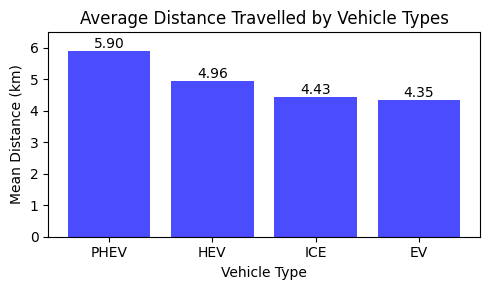

In [51]:
'''
Plot a bar chart showing the average distance travelled by each vehicle type.
- Uses matplotlib to create a bar plot of mean distance per vehicle type.
- Sets figure size, axis labels, and title.
- Limits y-axis to 10% above the maximum mean distance.
- Annotates each bar with its value.
- Displays the plot.
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.bar(df_distance['Vehicle Type'], df_distance['Distance[km]'], alpha=0.7, color='blue')
plt.title('Average Distance Travelled by Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Distance (km)')
plt.ylim(0, df_distance['Distance[km]'].max() * 1.1)  # Set y-axis limit to 10% above max distance
# Add text labels on top of the bars
for index, value in enumerate(df_distance['Distance[km]']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [49]:
"""
Calculate the average HV Battery Voltage for each day:
- Convert the 'Date' column to datetime format.
- Group the DataFrame by day and compute the mean of 'HV Battery Voltage[V]'.
- Reset the index and convert the period index back to timestamps.
- Sort the resulting DataFrame by date.
"""

df['Date'] = pd.to_datetime(df['Date'])
df_eot = df.groupby(df['Date'].dt.to_period('D'))['HV Battery Voltage[V]'].mean().reset_index()
df_eot['Date'] = df_eot['Date'].dt.to_timestamp()
df_eot = df_eot.sort_values(by='Date')
df_eot

,Date,HV Battery Voltage[V]
0,2017-11-01,340.664036
1,2017-11-02,252.101365
2,2017-11-03,258.550106
3,2017-11-04,273.978090
4,2017-11-05,321.147487
...,...,...
73,2018-03-24,253.762327
74,2018-03-25,320.406958
75,2018-03-26,280.713340
76,2018-03-27,348.769579


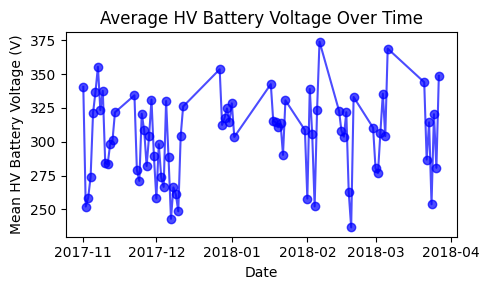

In [50]:
'''
Plot the average HV Battery Voltage over time:
- Uses matplotlib to create a line plot of mean HV Battery Voltage per day.
- Sets figure size, axis labels, and title.
- Displays the plot.
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eot['Date'], df_eot['HV Battery Voltage[V]'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average HV Battery Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Mean HV Battery Voltage (V)')
plt.tight_layout()
plt.show()

In [52]:
"""
Calculate the average Fuel Consumption Rate (FCR) for each day:
- Ensure the 'Date' column is in datetime format.
- Group the DataFrame by day and compute the mean of 'FCR'.
- Reset the index and convert the period index back to timestamps.
- Sort the resulting DataFrame by date.
"""

df['Date'] = pd.to_datetime(df['Date'])
df_eof = df.groupby(df['Date'].dt.to_period('D'))['FCR'].mean().reset_index()
df_eof['Date'] = df_eof['Date'].dt.to_timestamp()
df_eof = df_eof.sort_values(by='Date')
df_eof = df_eof[df_eof['Date'] != df_eof['Date'].min()] # Starting Date with FCR 0 is filtered out
df_eof

,Date,FCR
1,2017-11-02,0.701036
2,2017-11-03,0.900423
3,2017-11-04,0.814091
4,2017-11-05,0.738375
5,2017-11-06,0.716818
...,...,...
73,2018-03-24,0.803490
74,2018-03-25,0.843573
75,2018-03-26,0.904103
76,2018-03-27,0.851521


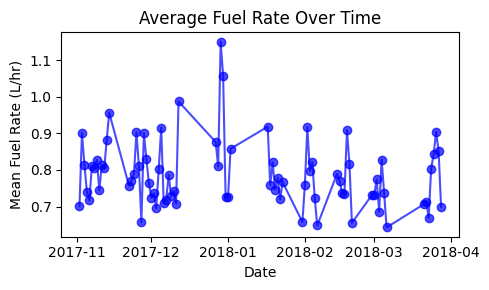

In [53]:
'''
Plot the average Fuel Consumption Rate (FCR) over time:
- Uses matplotlib to create a line plot of mean FCR per day.
- Sets figure size, axis labels, and title.
- Displays the plot.
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eof['Date'], df_eof['FCR'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Fuel Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Fuel Rate (L/hr)')
plt.tight_layout()
plt.show()

In [54]:
'''
Average Trip Count by Location (Heat Map)
'''

df_map = df.groupby(['Latitude[deg]', 'Longitude[deg]','Vehicle Type'])['Trip'].mean().reset_index()
df_map

,Latitude[deg],Longitude[deg],Vehicle Type,Trip
0,42.220305,-83.760323,ICE,1661.0
1,42.220306,-83.767207,HEV,1502.0
2,42.220316,-83.734527,ICE,1955.0
3,42.220316,-83.760919,ICE,1399.0
4,42.220321,-83.796176,ICE,506.0
...,...,...,...,...
984174,42.325675,-83.756705,ICE,1983.0
984175,42.325766,-83.749093,ICE,1983.0
984176,42.325775,-83.749506,ICE,1983.0
984177,42.325780,-83.756816,ICE,1983.0


In [55]:
df_map.head()

,Latitude[deg],Longitude[deg],Vehicle Type,Trip
0,42.220305,-83.760323,ICE,1661.0
1,42.220306,-83.767207,HEV,1502.0
2,42.220316,-83.734527,ICE,1955.0
3,42.220316,-83.760919,ICE,1399.0
4,42.220321,-83.796176,ICE,506.0


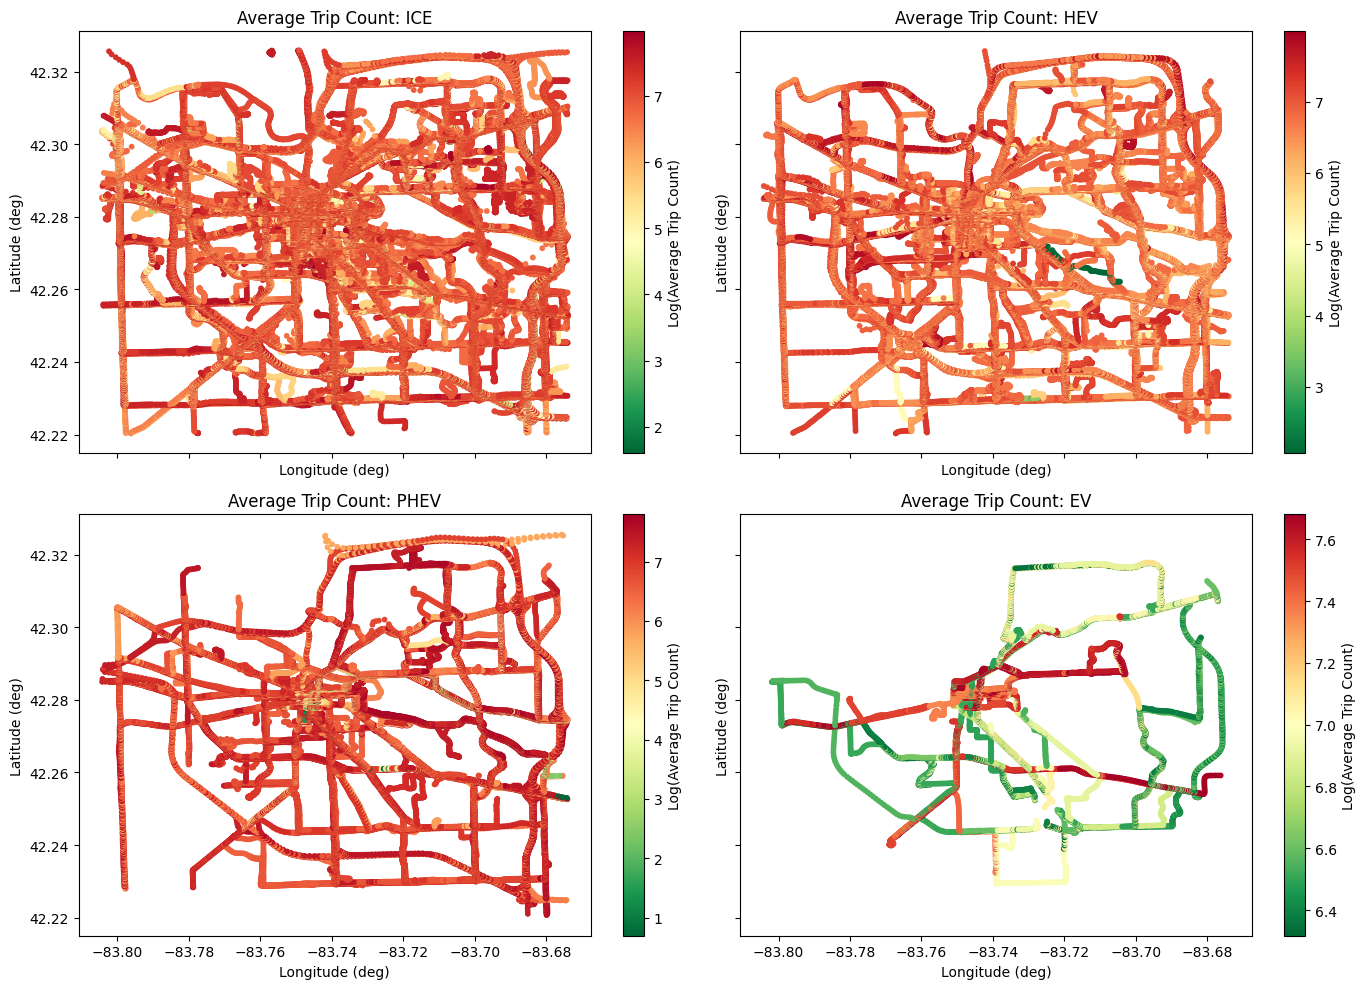

In [56]:
'''
The code visualized the average trip count by location for each vehicle type using a scatter plot on subplots. 
It iterated over unique vehicle types, filtered the data for each type, and plotted longitude and latitude with color representing the logarithm of the average trip count. 
It set subplot titles and axis labels, and added a colorbar for each subplot. 
Finally, it adjusted the layout and displayed the figure.
'''

import matplotlib.pyplot as plt

vehicle_types = df_map['Vehicle Type'].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, vtype in enumerate(vehicle_types):
    ax = axes[idx]
    data = df_map[df_map['Vehicle Type'] == vtype]
    sc = ax.scatter(
        data['Longitude[deg]'],
        data['Latitude[deg]'],
        c=np.log(data['Trip']),
        marker='o',
        s=10,
        cmap='RdYlGn_r'
    )
    ax.set_title(f'Average Trip Count: {vtype}')
    ax.set_xlabel('Longitude (deg)')
    ax.set_ylabel('Latitude (deg)')
    plt.colorbar(sc, ax=ax, label='Log(Average Trip Count)')

plt.tight_layout()
plt.show()


In [57]:
'''
Average Trips Over Time
'''

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate average trips per month
df_trip = df.groupby(df['Date'].dt.to_period('M'))['Trip'].mean().reset_index()
df_trip['Date'] = df_trip['Date'].dt.to_timestamp()
df_trip = df_trip.sort_values(by='Date')
df_trip

,Date,Trip
0,2017-11-01,810.211164
1,2017-12-01,889.058995
2,2018-01-01,1042.154448
3,2018-02-01,1164.122802
4,2018-03-01,1278.197673


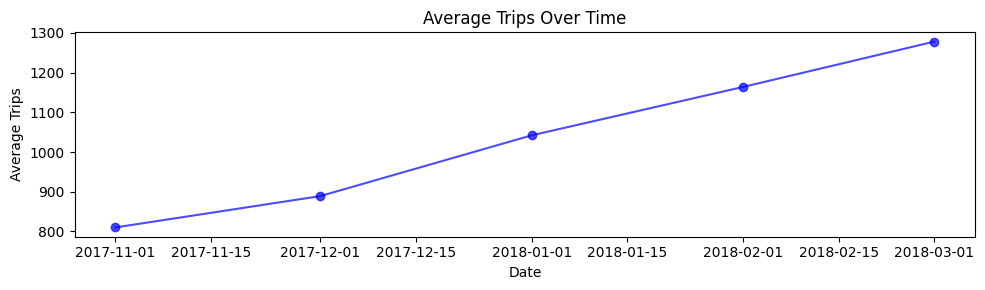

In [58]:
'''
Plot the average number of trips over time using a line plot.
Set figure size, plot the data with markers and lines, set the title and axis labels, adjust layout, and display the plot.
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(df_trip['Date'], df_trip['Trip'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Average Trips')
plt.tight_layout()
plt.show()

In [59]:
push_df_to_s3_parquet(df, 'Cleaned up VED Source Data/df_VED.parquet')

DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_VED.parquet


# Exploratory Data Analysis

*   **Correlations:** Identified strong relationships between energy consumption and dynamic variables like **Vehicle Speed**, **Engine RPM**, and **Absolute Load**.
*   **Visualizations:** Mapped trip density via heatmaps and analyzed trends in battery voltage and fuel rates over time.

In [60]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) and Battery SOC using the features Battery Power, AC Power, Heater Power with respect to OAT_Category and Vehicle Type
'''

df_SOC = df.groupby(['OAT_Category', 'Vehicle Type'])[
    ['HV Battery Power[Watts]', 'Air Conditioning Power[Watts]', 'Heater Power[Watts]','HV Battery SOC[%]','FCR']
].mean().reset_index().sort_values(by='HV Battery SOC[%]', ascending=False)

df_SOC

,OAT_Category,Vehicle Type,HV Battery Power[Watts],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery SOC[%],FCR
4,Cool,EV,-6335.480657,381.597996,311.882686,79.973926,NaN
12,Mild,EV,-4438.888148,36.930041,121.851852,77.668316,NaN
0,Cold,EV,-6722.119330,553.080897,1153.021043,67.969506,NaN
18,Warm,PHEV,-5595.309732,790.499485,NaN,63.454865,NaN
11,Hot,PHEV,-4126.723111,746.000000,NaN,41.616707,NaN
9,Extremely Cold,PHEV,-1956.295121,0.000000,NaN,32.569278,5.772301
3,Cold,PHEV,-3935.721770,4.651720,NaN,32.000160,1.625275
15,Mild,PHEV,-4173.067713,262.509246,NaN,30.322495,0.728830
7,Cool,PHEV,-3655.948852,19.399815,NaN,28.368700,1.012136
1,Cold,HEV,NaN,NaN,NaN,NaN,0.545551


In [61]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Trip and Vehicle Type
'''

df_EC_trip = df.groupby(['Trip','Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
       ]
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_EC_trip

,Trip,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
2967,1565,PHEV,42.294431,-83.792628,NaN,NaN,65.298611,8.187884,2105.895692,-18.674603,4000.0,7.870564,7689.712572,NaN,NaN,NaN,NaN,NaN,NaN
375,315,PHEV,42.268065,-83.719317,0.0,NaN,41.429412,2.678766,498.723627,8.862685,4000.0,7.655621,-3931.990481,0.710000,NaN,NaN,NaN,NaN,NaN
810,548,PHEV,42.286983,-83.725747,NaN,NaN,51.807823,0.543479,2074.414966,-3.000000,4000.0,7.630475,6030.385734,NaN,NaN,NaN,NaN,NaN,NaN
815,550,PHEV,42.287149,-83.725484,NaN,NaN,57.994318,0.530423,2231.636364,7.000000,4000.0,6.844090,6130.958314,NaN,NaN,NaN,NaN,NaN,NaN
1011,644,PHEV,42.316843,-83.699489,NaN,NaN,69.112672,0.585098,1877.917431,3.614679,4000.0,6.799322,6983.277760,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,2596,ICE,42.277079,-83.739363,NaN,NaN,11.580198,0.674572,973.958416,NaN,NaN,NaN,NaN,16.041347,22.205397,NaN,NaN,NaN,NaN
3697,2601,ICE,42.229799,-83.722897,NaN,NaN,47.079208,3.337745,1591.170297,NaN,3500.0,NaN,NaN,NaN,NaN,2.257116,NaN,1.316522,NaN
3721,2883,ICE,42.276460,-83.680983,NaN,NaN,50.807860,0.796445,1235.310044,7.069869,3500.0,NaN,NaN,14.933362,28.040072,-0.849481,-9.136190,NaN,NaN
3722,2889,ICE,42.242932,-83.680755,NaN,NaN,39.779528,1.631204,1202.423622,5.344882,3500.0,NaN,NaN,14.764094,30.331327,-0.832923,-9.281496,NaN,NaN


In [62]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Date (Month) and Vehicle Type
'''

df_EC_time = df.groupby([df['Date'].dt.to_period('M'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
1,2017-11,HEV,42.270753,-83.730518,NaN,NaN,43.437104,4.301229,1048.747374,NaN,3228.776277,0.548196,NaN,7.999570,26.907335,-0.680006,-0.132401,0.041647,-0.494038
2,2017-11,ICE,42.272108,-83.729198,NaN,NaN,37.351677,4.187160,1383.917974,NaN,3549.981560,0.878507,NaN,12.314993,30.346357,0.489267,0.106684,1.526966,1.544187
3,2017-11,PHEV,42.275141,-83.725549,104.050681,NaN,40.693952,6.113691,425.540190,5.214369,3644.709011,1.062796,-3962.267188,4.219093,NaN,NaN,NaN,NaN,NaN
0,2017-11,EV,42.271939,-83.730601,414.954458,336.061841,37.265814,5.296786,NaN,5.191515,3500.000000,NaN,-5763.581448,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-12,HEV,42.270572,-83.728986,NaN,NaN,43.244043,5.337657,1098.659931,NaN,3233.417042,0.562779,NaN,8.284857,26.818614,-0.775959,-0.553670,0.117204,-0.832392
6,2017-12,ICE,42.271020,-83.729605,NaN,NaN,38.066903,5.011327,1395.176585,NaN,3528.523832,0.854187,NaN,12.088989,30.830913,0.366211,-0.181285,1.737142,1.472607
7,2017-12,PHEV,42.272870,-83.724669,4.711894,NaN,38.266598,6.458477,531.664092,-1.216775,3616.812793,1.440610,-3341.318150,4.805669,NaN,NaN,NaN,NaN,NaN
4,2017-12,EV,42.270083,-83.719460,403.627442,573.992110,48.326677,3.511447,NaN,1.345473,3500.000000,NaN,-7287.185967,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-01,HEV,42.273033,-83.730757,NaN,NaN,40.747353,5.106211,1160.830488,-3.297758,3226.098228,0.552229,NaN,8.226475,28.352170,-0.698954,0.281189,-0.803102,-1.831730
10,2018-01,ICE,42.271214,-83.729482,NaN,NaN,37.099920,4.323440,1391.578431,-3.010891,3488.727476,0.825635,NaN,11.722811,31.526208,0.479709,0.534779,1.142479,1.572542


In [63]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Date and Vehicle Type
'''

df_EC_time = df.groupby([df['Date'].dt.to_period('D'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
3,2017-11-01,PHEV,42.278267,-83.732073,426.147883,NaN,34.700193,2.692697,142.962038,8.476688,3720.254777,0.000000,-5019.208787,3.129290,NaN,NaN,NaN,NaN,NaN
0,2017-11-01,EV,42.278107,-83.758085,55.038760,2096.899225,35.550077,0.490034,NaN,5.000000,3500.000000,NaN,-4495.982558,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-01,HEV,42.271738,-83.735503,NaN,NaN,43.912155,3.586749,1013.159684,NaN,3201.911308,NaN,NaN,7.528161,25.843640,NaN,NaN,NaN,NaN
2,2017-11-01,ICE,42.275334,-83.735704,NaN,NaN,32.379000,3.824206,1320.550910,NaN,3536.946296,NaN,NaN,11.613017,29.339840,NaN,NaN,NaN,NaN
7,2017-11-02,PHEV,42.268268,-83.725600,46.055131,NaN,38.199360,6.846114,476.956610,4.254588,3431.743514,0.000000,-2729.091397,4.343766,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2018-03-27,HEV,42.271589,-83.732170,NaN,NaN,49.159311,4.280027,1100.457228,2.909523,3229.915696,0.567006,NaN,8.318865,26.552560,-0.549761,1.600151,0.829528,-2.992021
279,2018-03-27,ICE,42.272538,-83.719731,NaN,NaN,43.773547,3.065973,1477.459770,1.827866,3428.682365,0.895238,NaN,12.560935,32.143458,0.909867,-3.329158,1.466398,1.496950
280,2018-03-27,PHEV,42.271897,-83.722388,59.212198,NaN,45.297651,1.533832,387.065237,2.099985,4000.000000,1.414753,-4606.851790,2.881144,NaN,NaN,NaN,NaN,NaN
277,2018-03-27,EV,42.247692,-83.760389,350.000000,0.000000,52.620438,0.909519,NaN,1.775338,3500.000000,NaN,-8331.605574,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features Speed, Absolute Load[%], Engine RPM, OAT, Generalized_Weight with respect to Latitude, Longitude and Vehicle Type
'''

df_la_lo = df.groupby(['Latitude[deg]','Longitude[deg]','Vehicle Type'])[
    ['Vehicle Speed[km/h]', 'Absolute Load[%]','Engine RPM[RPM]','OAT[DegC]','Generalized_Weight','FCR','HV Battery Power[Watts]']
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_la_lo


,Latitude[deg],Longitude[deg],Vehicle Type,Vehicle Speed[km/h],Absolute Load[%],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts]
78881,42.237157,-83.730340,PHEV,121.953125,NaN,4060.800000,7.0,3500.0,19.924206,-23907.512715
178231,42.249462,-83.683875,PHEV,134.000000,NaN,3405.666667,6.0,3500.0,17.677546,-524.468750
80339,42.237267,-83.726786,PHEV,120.000000,NaN,3947.600000,6.5,3500.0,17.090837,11379.409279
80766,42.237298,-83.725577,PHEV,119.134375,NaN,3424.600000,6.5,3500.0,16.327641,-54494.025916
797285,42.289601,-83.803461,PHEV,112.480903,NaN,3175.666667,-18.5,4000.0,16.055752,7260.586510
...,...,...,...,...,...,...,...,...,...,...
984100,42.325111,-83.748894,ICE,80.555556,NaN,1371.666667,NaN,5000.0,NaN,NaN
984115,42.325151,-83.748901,ICE,85.250000,74.509804,1683.000000,NaN,4500.0,NaN,NaN
984159,42.325349,-83.748998,ICE,97.857143,NaN,1640.000000,NaN,5000.0,NaN,NaN
984161,42.325380,-83.748911,ICE,91.125000,NaN,1528.875000,NaN,5000.0,NaN,NaN


In [65]:
'''
ICE, HEV, EV and PHEV Analysis (Distance vs FCR and HV Battery Power[Watts]
'''

df_EC_trip_ICE_HEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_trip_EV_PHEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['EV','PHEV'])]


df_EC_time_ICE_HEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_time_EV_PHEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['EV','PHEV'])]


In [66]:
for i in df_EC_trip_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_ICE_HEV[i].unique())
    print(df_EC_trip_ICE_HEV[i].value_counts())

Unique values in column 'Trip':
[1637  293  340 ... 2883 2889 2898]
Trip
1473    2
745     2
629     2
447     2
1445    2
       ..
2512    1
2511    1
2506    1
2480    1
2471    1
Name: count, Length: 1976, dtype: int64
Unique values in column 'Vehicle Type':
['ICE' 'HEV']
Vehicle Type
ICE    1850
HEV    1164
Name: count, dtype: int64
Unique values in column 'Latitude[deg]':
[42.27566207 42.26802927 42.26990241 ... 42.27646014 42.24293158
 42.27248859]
Latitude[deg]
42.272489    1
42.275662    1
42.268029    1
42.269902    1
42.247261    1
            ..
42.299086    1
42.271396    1
42.278524    1
42.272048    1
42.254258    1
Name: count, Length: 3014, dtype: int64
Unique values in column 'Longitude[deg]':
[-83.68216709 -83.68034    -83.69598954 ... -83.68098319 -83.68075538
 -83.68563487]
Longitude[deg]
-83.685635    1
-83.682167    1
-83.680340    1
-83.695990    1
-83.698104    1
             ..
-83.727965    1
-83.727527    1
-83.739967    1
-83.701715    1
-83.739772    1
Nam

In [67]:
for i in df_EC_trip_EV_PHEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_EV_PHEV[i].unique())
    print(df_EC_trip_EV_PHEV[i].value_counts())

Unique values in column 'Trip':
[1565  315  548  550  644  499  276  485  340  643 1196  387  448 1634
  322  513  267  446 1212 1366  498 1569 1085 1109 1011  520  750  487
  511  281  845  278  515 1566 1003  444  453 1240 2265  552  579  451
 1558  570  268  889  555  284  509  460 1465  335  271  512 1040 1620
 1269  646 1029  358  648  459  305  261  842  273 1385  383 1069 1179
  458 1072 1009 1232  625 1420 1075 1550 1199 1024 1122  569  747  599
 1206  755  784  962 1469 1595 1214  741  285 1747 1139  742  699 1605
 1185  456 1392 1819  327  413  793  947  664  814  493  785  688  938
  370  488 1001 1091 1689 1816 1005 1615 1464 1598  881 1490  225 1825
 1123 1481  539  316  702 1268 1015  890  751 1149  671 1037 1419  880
  598  306  753  761 1247 1619 1648  954  737 1432 2413  473  790  723
 1065  364  532  424 1451 1374 1610  678 1250 1416 1133 1282 1371  491
 1084  472 1467 1076 1267 1438  462  710 1047 1376 1290  953  542 1265
  259 1010  989 1278 2254  258 1414  481 1652

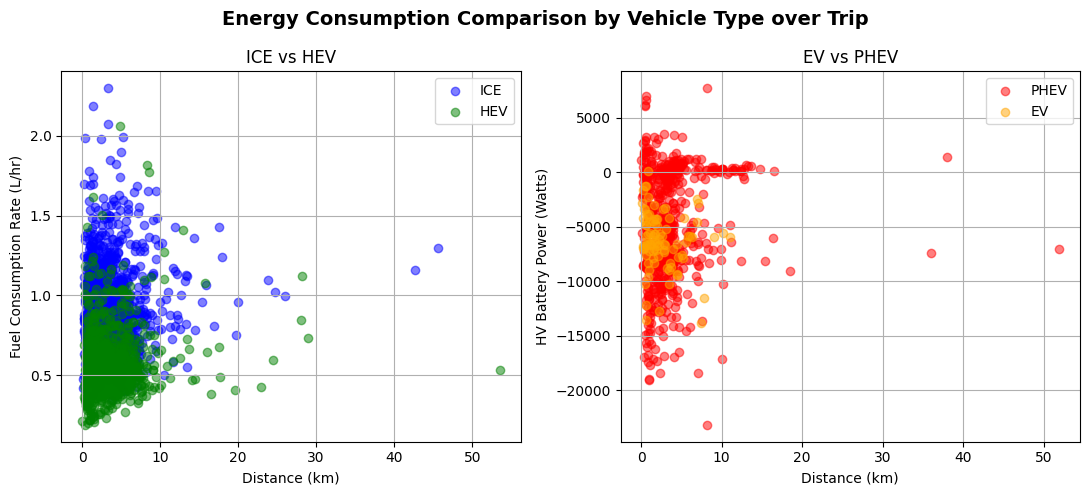

In [68]:
'''
Created Scatter plots to show Energy Consumption Comparison by Vehicle Type by Trip
Distance vs FCR for ICE and HEV
Distance vs HV Battery Power[Watts] for EV and PHEV
'''

import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Trip', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


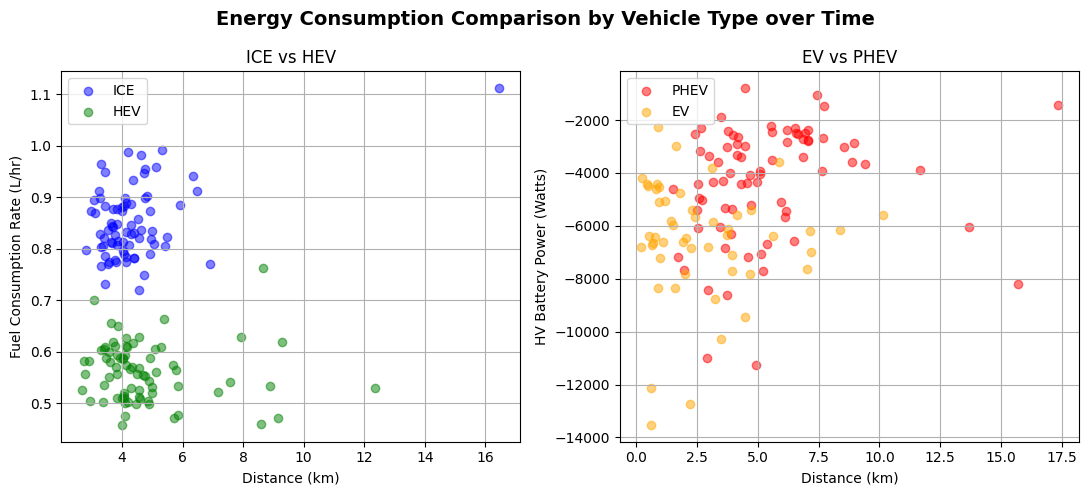

In [69]:
'''
Created Scatter plots to show Energy Consumption Comparison by Vehicle Type over Time
Distance vs FCR for ICE and HEV
Distance vs HV Battery Power[Watts] for EV and PHEV
'''

import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Time', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


In [70]:
'''
Individual Vehicle Type analysis by Trip: df_ICE, df_HEV, df_EV, df_PHEV
'''

# Run for trip
df_ICE = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']


In [ ]:
'''
Individual Vehicle Type analysis by Time: df_ICE, df_HEV, df_EV, df_PHEV

# Run for time
df_ICE = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']

'''

In [71]:
'''
Handled Missing values as it is required during Regression
'''

# show the columns with missing values in df_ICE and df_HEV

missing_values = df_ICE.isnull().sum()
print("\nMissing values in ICE Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_HEV.isnull().sum()
print("\nMissing values in HEV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_EV.isnull().sum()
print("\nMissing values in EV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_PHEV.isnull().sum()
print("\nMissing values in PHEV Vehicles:")
print(missing_values[missing_values > 0])



Missing values in ICE Vehicles:
Air Conditioning Power[Watts]     1850
Heater Power[Watts]               1850
Vehicle Speed[km/h]                  2
Distance[km]                         2
Engine RPM[RPM]                      2
OAT[DegC]                         1148
Generalized_Weight                  92
FCR                                212
HV Battery Power[Watts]           1850
MAF[g/sec]                         207
Absolute Load[%]                   156
Short Term Fuel Trim Bank 1[%]      80
Short Term Fuel Trim Bank 2[%]     833
Long Term Fuel Trim Bank 1[%]       87
Long Term Fuel Trim Bank 2[%]      852
dtype: int64

Missing values in HEV Vehicles:
Air Conditioning Power[Watts]     1164
Heater Power[Watts]               1164
Vehicle Speed[km/h]                  1
Distance[km]                         1
Engine RPM[RPM]                      1
OAT[DegC]                          631
FCR                                 82
HV Battery Power[Watts]           1164
MAF[g/sec]              

In [72]:
# Handle missing values

df_ICE.fillna({
    'OAT[DegC]': 15,
    'Generalized_Weight': df_ICE['Generalized_Weight'].mean(),
    'FCR': df_ICE['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # ICE vehicles typically do not have HV Battery Power
    'Air Conditioning Power[Watts]' : 0,
    'Heater Power[Watts]': df_ICE['Heater Power[Watts]'].mean(),
    'MAF[g/sec]': df_ICE['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_ICE['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_ICE['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_ICE['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_ICE['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_ICE['Long Term Fuel Trim Bank 2[%]'].mean(),
    'Vehicle Speed[km/h]': df_ICE['Vehicle Speed[km/h]'].mean(),
    'Distance[km]': df_ICE['Distance[km]'].mean(),
    'Engine RPM[RPM]': df_ICE['Engine RPM[RPM]'].mean()
}, inplace=True)

df_HEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_HEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0,
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_HEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_HEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_HEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_HEV['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_HEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_HEV['Long Term Fuel Trim Bank 2[%]'].mean(),'Vehicle Speed[km/h]': df_ICE['Vehicle Speed[km/h]'].mean(),
    'Distance[km]': df_HEV['Distance[km]'].mean(),
    'Engine RPM[RPM]': df_HEV['Engine RPM[RPM]'].mean()
}, inplace=True)

df_EV.fillna({
    'Engine RPM[RPM]': 0,  # EVs typically do not have engine RPM
    'FCR': 0,  # EVs typically do not have fuel consumption rate  
    'MAF[g/sec]': 0,
    'Absolute Load[%]': 0,
    'Short Term Fuel Trim Bank 1[%]': 0,
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': 0,
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)

df_PHEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_PHEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # PHEVs typically do not have HV Battery Power
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_PHEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_PHEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_PHEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': df_PHEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)


In [ ]:
df_ICE.describe()

In [ ]:
df_HEV.describe()

In [ ]:
df_PHEV.describe()

In [ ]:
df_EV.describe()

In [73]:
"""
Created a function to Perform linear regression using given features and target.
Prints model coefficients, regression equation, and evaluation metrics.
Returns:
    model: Trained linear regression model.
    X_test, y_test: Test data for further analysis.
    y_pred: Predictions on test set.
    regression_line_model: Model for plotting Actual vs Predicted regression line.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def linear_regression_analysis(features, target, X, y):

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print model coefficients
    print("Model Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"  {feature}: {coef:.4f}")

    # Print regression equation
    equation = " + ".join([f"{coef:.4f}*{feature}" for feature, coef in zip(features, model.coef_)])
    print(f"\nRegression Equation:")
    print(f"  Slope of the regression line: {model.coef_}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Target Variable: {target}")
    print(f"  {target} = {equation} + {model.intercept_:.4f}\n")

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Evaluation Metrics:")
    print(f"  R² Score  : {r2:.4f}")
    print(f"  MAE       : {mae:.4f}")
    print(f"  MSE       : {mse:.4f}")
    print(f"  RMSE      : {rmse:.4f}\n")

    # Regression line for plotting (optional)
    regression_line_model = LinearRegression()
    regression_line_model.fit(y_test.values.reshape(-1, 1), y_pred)

    return model, X_test, y_test, y_pred, regression_line_model


# Linear Regression to Predict Energy Consumption in ICE, HEV, EV and PHEV Vehicles

Model Coefficients:
  Vehicle Speed[km/h]: 0.0095
  Distance[km]: 0.0003

Regression Equation:
  Slope of the regression line: [0.00948307 0.0002586 ]
  Intercept: 0.5035
  Target Variable: FCR
  FCR = 0.0095*Vehicle Speed[km/h] + 0.0003*Distance[km] + 0.5035

Evaluation Metrics:
  R² Score  : 0.1874
  MAE       : 0.1436
  MSE       : 0.0345
  RMSE      : 0.1858



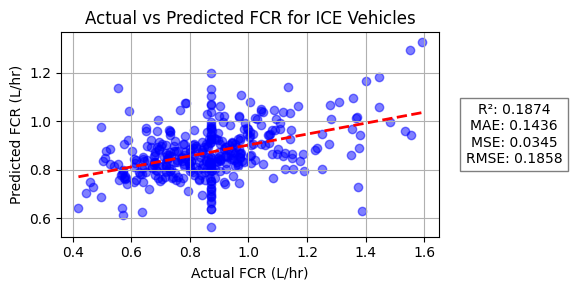

In [74]:
"""
Scenario 1 for ICE
Performed linear regression analysis to predict FCR for ICE vehicles using 'Vehicle Speed[km/h]' and 'Distance[km]' as features.
Trained the model and obtained predictions on the test set.
Plotted Actual vs Predicted FCR values and the regression line.
Displayed evaluation metrics (R², MAE, MSE, RMSE) on the plot.
"""

#features = ['Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]']
features = ['Vehicle Speed[km/h]','Distance[km]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
X = df_ICE[features]
print(X.head())
y = df_ICE[target]
print(y.head())

      Vehicle Speed[km/h]  Distance[km]
3086            71.199588      3.336882
339             55.280435      1.337339
422             55.131579      3.372505
2801            78.166852      5.286740
3480            36.728477      0.398852
3086    2.298379
339     2.188477
422     2.076016
2801    1.994577
3480    1.984249
Name: FCR, dtype: float64


In [76]:
param = [model, X_test, y_test, y_pred, regression_line_model, y_test_sorted, y_line]

# print the value of the param variable using for loop

for i, value in enumerate(param):
    print(f"Parameter {i}: {value}")
    print()  # Add a newline for better readability

Parameter 0: LinearRegression()

Parameter 1:       Vehicle Speed[km/h]  Distance[km]
583             51.631868      3.327974
113             33.507289      2.118764
2559            36.015909      3.028503
1002            43.093996      5.676134
2331            30.373119      2.284008
...                   ...           ...
3092            33.721195      2.308274
647             37.289376      5.401196
2829            27.263300      1.494319
2343            42.880246      1.428060
3164            31.380020      2.640701

[370 rows x 2 columns]

Parameter 2: 583     1.106431
113     0.553769
2559    0.942000
1002    0.842179
2331    0.717631
          ...   
3092    0.965098
647     0.812843
2829    0.829558
2343    1.069924
3164    1.151980
Name: FCR, Length: 370, dtype: float64

Parameter 3: [0.9939539  0.82176452 0.8457892  0.91359587 0.7920857  0.64182502
 0.98392366 0.83650246 0.85241939 0.85613979 0.75647866 0.83690364
 0.88411493 0.81351054 0.82282677 1.01716732 0.81527195 0.9042

Model Coefficients:
  Latitude[deg]: 0.0605
  Longitude[deg]: 0.1722
  Vehicle Speed[km/h]: 0.0074
  Distance[km]: -0.0015
  Engine RPM[RPM]: 0.0002
  OAT[DegC]: 0.0011
  Generalized_Weight: 0.0002

Regression Equation:
  Slope of the regression line: [ 0.06045161  0.17222124  0.00735495 -0.00152155  0.00022506  0.00105238
  0.00020136]
  Intercept: 11.4261
  Target Variable: FCR
  FCR = 0.0605*Latitude[deg] + 0.1722*Longitude[deg] + 0.0074*Vehicle Speed[km/h] + -0.0015*Distance[km] + 0.0002*Engine RPM[RPM] + 0.0011*OAT[DegC] + 0.0002*Generalized_Weight + 11.4261

Evaluation Metrics:
  R² Score  : 0.3866
  MAE       : 0.1205
  MSE       : 0.0261
  RMSE      : 0.1614



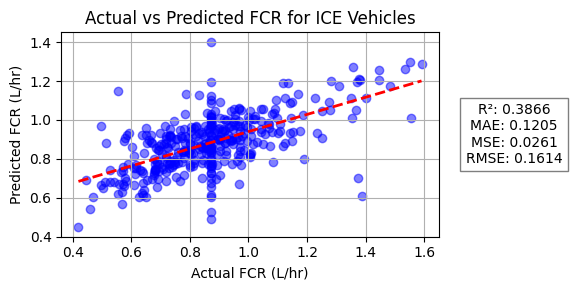

In [77]:
"""
Scenario 2 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

features = ['Latitude[deg]','Longitude[deg]','Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Vehicle Speed[km/h]: 0.0074
  Distance[km]: -0.0014
  Engine RPM[RPM]: 0.0002
  OAT[DegC]: 0.0010
  Generalized_Weight: 0.0002

Regression Equation:
  Slope of the regression line: [ 0.00735636 -0.00137758  0.0002257   0.00104617  0.0002006 ]
  Intercept: -0.4373
  Target Variable: FCR
  FCR = 0.0074*Vehicle Speed[km/h] + -0.0014*Distance[km] + 0.0002*Engine RPM[RPM] + 0.0010*OAT[DegC] + 0.0002*Generalized_Weight + -0.4373

Evaluation Metrics:
  R² Score  : 0.3841
  MAE       : 0.1206
  MSE       : 0.0262
  RMSE      : 0.1618



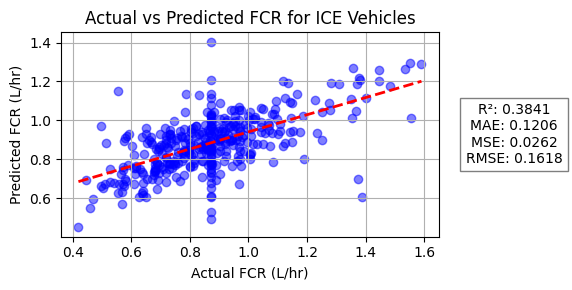

In [78]:
"""
Scenario 3 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
#features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Vehicle Speed[km/h]: 0.0035
  Distance[km]: 0.0002
  Generalized_Weight: 0.0001
  MAF[g/sec]: 0.0372
  Absolute Load[%]: 0.0066
  Short Term Fuel Trim Bank 1[%]: -0.0004
  Short Term Fuel Trim Bank 2[%]: 0.0029
  Long Term Fuel Trim Bank 1[%]: 0.0076
  Long Term Fuel Trim Bank 2[%]: 0.0005

Regression Equation:
  Slope of the regression line: [ 3.51771144e-03  1.54859609e-04  8.60672719e-05  3.72308331e-02
  6.57019976e-03 -3.68340265e-04  2.92205509e-03  7.63933480e-03
  4.79373945e-04]
  Intercept: -0.2424
  Target Variable: FCR
  FCR = 0.0035*Vehicle Speed[km/h] + 0.0002*Distance[km] + 0.0001*Generalized_Weight + 0.0372*MAF[g/sec] + 0.0066*Absolute Load[%] + -0.0004*Short Term Fuel Trim Bank 1[%] + 0.0029*Short Term Fuel Trim Bank 2[%] + 0.0076*Long Term Fuel Trim Bank 1[%] + 0.0005*Long Term Fuel Trim Bank 2[%] + -0.2424

Evaluation Metrics:
  R² Score  : 0.6887
  MAE       : 0.0770
  MSE       : 0.0132
  RMSE      : 0.1150



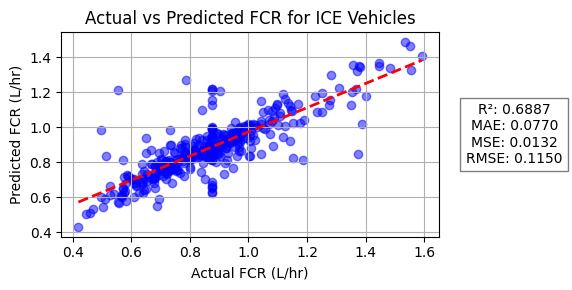

In [79]:
"""
Scenario 4 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Used features: Vehicle Speed[km/h], Distance[km], Generalized_Weight, MAF[g/sec], Absolute Load[%], Short Term Fuel Trim Bank 1[%], Short Term Fuel Trim Bank 2[%], Long Term Fuel Trim Bank 1[%], Long Term Fuel Trim Bank 2[%].
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

#features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight','MAF[g/sec]',
#                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
#       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
#       'Long Term Fuel Trim Bank 2[%]']
features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Generalized_Weight','MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  MAF[g/sec]: 0.0629

Regression Equation:
  Slope of the regression line: [0.06293091]
  Intercept: 0.0413
  Target Variable: FCR
  FCR = 0.0629*MAF[g/sec] + 0.0413

Evaluation Metrics:
  R² Score  : 0.9440
  MAE       : 0.0216
  MSE       : 0.0013
  RMSE      : 0.0359



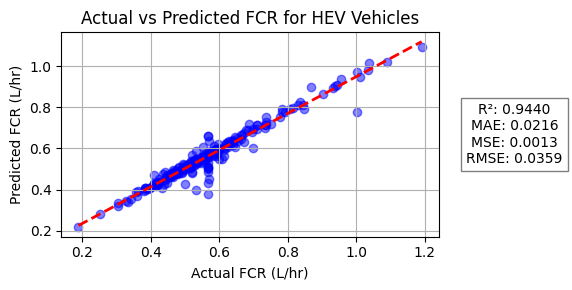

In [80]:
"""
Scenario 1 for HEV
Performed linear regression analysis for HEV vehicles using 'MAF[g/sec]' as the feature and 'FCR' as the target.
Trained the model and generated predictions on the test set.
Plotted Actual vs Predicted FCR values and the regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

'''
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
               'Engine RPM[RPM]',
                 'OAT[DegC]',
                   'Generalized_Weight',
                   'HV Battery Power[Watts]',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
                   ]
'''
'''
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
                   'Generalized_Weight',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
        'Long Term Fuel Trim Bank 1[%]'
                   ]
'''



features = [
    'MAF[g/sec]'
]

target = 'FCR'
X = df_HEV[features]
y = df_HEV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for HEV Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
'''
Created a function to handle outliers using IQR
'''

def handle_outliers_iqr(df, columns, method='cap'):
    """
    Detects and handles outliers in specified columns using the IQR method.
    Adds boolean columns for outlier flags and modifies outliers in place.
    method: 'cap' (default) replaces outliers with nearest bound, 'remove' drops outlier rows.
    Returns the modified DataFrame.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_flag = (df[col] < lower) | (df[col] > upper)
        df[f'{col}_outlier'] = outlier_flag
        if method == 'cap':
            df.loc[df[col] < lower, col] = lower
            df.loc[df[col] > upper, col] = upper
        elif method == 'remove':
            df = df[~outlier_flag]
    return df

# Example usage for EV outliers (capping outliers)
outlier_columns = ['Air Conditioning Power[Watts]','Heater Power[Watts]','Vehicle Speed[km/h]','HV Battery Power[Watts]']
df_EV_clean = handle_outliers_iqr(df_EV, outlier_columns, method='cap')
df_EV_clean.head()

,Trip,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],...,MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],Air Conditioning Power[Watts]_outlier,Heater Power[Watts]_outlier,Vehicle Speed[km/h]_outlier,HV Battery Power[Watts]_outlier
822,554,EV,42.244071,-83.736644,95.625000,182.812500,46.201749,0.881169,0.0,11.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True
2172,1143,EV,42.244397,-83.731922,0.000000,0.000000,54.838408,0.557468,0.0,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
842,565,EV,42.243102,-83.721478,0.000000,0.000000,51.888828,0.495307,0.0,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
2250,1175,EV,42.254800,-83.725075,465.562249,489.457831,6.612898,0.212290,0.0,2.767068,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
1098,678,EV,42.272546,-83.749215,0.000000,0.000000,31.160595,0.896625,0.0,15.072848,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False


In [82]:
df_EV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.0,95.0,95.000000,95.0,95.0,95.0,95.0,95.0,95.0
mean,1274.105263,42.271297,-83.735505,451.206427,595.948098,38.120463,2.529701,0.0,2.758068,3500.0,0.0,-6257.533768,0.0,0.0,0.0,0.0,0.0,0.0
std,533.419428,0.017869,0.023455,389.532228,766.175778,12.568234,2.356622,0.0,6.301469,0.0,0.0,2555.379815,0.0,0.0,0.0,0.0,0.0,0.0
min,554.000000,42.231394,-83.792418,0.000000,0.000000,3.490542,0.174693,0.0,-13.153201,3500.0,0.0,-13857.507261,0.0,0.0,0.0,0.0,0.0,0.0
25%,737.000000,42.260824,-83.749556,79.973193,0.000000,30.045382,0.879309,0.0,-2.118267,3500.0,0.0,-7292.243492,0.0,0.0,0.0,0.0,0.0,0.0
50%,1149.000000,42.272546,-83.736166,370.610687,307.565789,39.347546,1.704800,0.0,2.894870,3500.0,0.0,-6377.998333,0.0,0.0,0.0,0.0,0.0,0.0
75%,1806.000000,42.284664,-83.723986,785.391036,852.601621,45.667038,3.458791,0.0,7.279737,3500.0,0.0,-4515.746667,0.0,0.0,0.0,0.0,0.0,0.0
max,2165.000000,42.307465,-83.682248,1224.153166,3545.282369,67.570289,11.031075,0.0,15.156609,3500.0,0.0,73.835938,0.0,0.0,0.0,0.0,0.0,0.0


Model Coefficients:
  Air Conditioning Power[Watts]: -2.5853
  Heater Power[Watts]: -1.2364
  Vehicle Speed[km/h]: -112.8938

Regression Equation:
  Slope of the regression line: [  -2.58530326   -1.23642892 -112.89382874]
  Intercept: -271.2544
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = -2.5853*Air Conditioning Power[Watts] + -1.2364*Heater Power[Watts] + -112.8938*Vehicle Speed[km/h] + -271.2544

Evaluation Metrics:
  R² Score  : -0.1497
  MAE       : 1752.7312
  MSE       : 5513130.9951
  RMSE      : 2348.0057



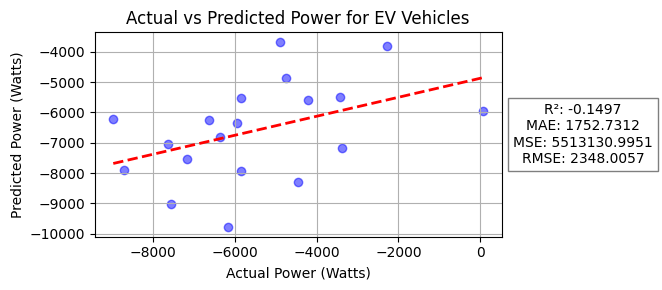

In [83]:
'''
Scenario 1 for EV
Selected features for linear regression analysis to predict HV Battery Power for EVs.
Performed linear regression using the selected features and target.
Plotted Actual vs Predicted Power for EV vehicles, including regression line and evaluation metrics (R², MAE, MSE, RMSE).
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight']
'''

'''
features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]']
'''

features = [
    'Air Conditioning Power[Watts]',
    'Heater Power[Watts]',
    'Vehicle Speed[km/h]',
]

target = 'HV Battery Power[Watts]'
X = df_EV[features]
y = df_EV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for EV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(
    1.20, 0.5,
    f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
    fontsize=10, ha='center', va='center', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Air Conditioning Power[Watts]: -2.0558
  Heater Power[Watts]: -1.3454
  Vehicle Speed[km/h]: -103.8481

Regression Equation:
  Slope of the regression line: [  -2.05582262   -1.34538495 -103.8481054 ]
  Intercept: -764.9562
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = -2.0558*Air Conditioning Power[Watts] + -1.3454*Heater Power[Watts] + -103.8481*Vehicle Speed[km/h] + -764.9562

Evaluation Metrics:
  R² Score  : -0.0733
  MAE       : 1695.1069
  MSE       : 4889657.5024
  RMSE      : 2211.2570



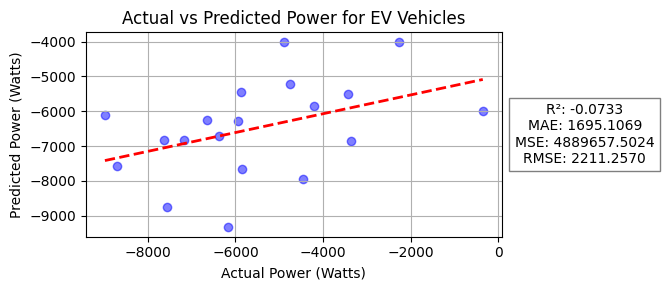

In [84]:
'''
Scenario 2 for EV without outliers
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight']
'''

'''
features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]']
'''


features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            ]


target = 'HV Battery Power[Watts]'
X = df_EV_clean[features]
y = df_EV_clean[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for EV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
df_EV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.0,95.0,95.000000,95.0,95.0,95.0,95.0,95.0,95.0
mean,1274.105263,42.271297,-83.735505,451.206427,595.948098,38.120463,2.529701,0.0,2.758068,3500.0,0.0,-6257.533768,0.0,0.0,0.0,0.0,0.0,0.0
std,533.419428,0.017869,0.023455,389.532228,766.175778,12.568234,2.356622,0.0,6.301469,0.0,0.0,2555.379815,0.0,0.0,0.0,0.0,0.0,0.0
min,554.000000,42.231394,-83.792418,0.000000,0.000000,3.490542,0.174693,0.0,-13.153201,3500.0,0.0,-13857.507261,0.0,0.0,0.0,0.0,0.0,0.0
25%,737.000000,42.260824,-83.749556,79.973193,0.000000,30.045382,0.879309,0.0,-2.118267,3500.0,0.0,-7292.243492,0.0,0.0,0.0,0.0,0.0,0.0
50%,1149.000000,42.272546,-83.736166,370.610687,307.565789,39.347546,1.704800,0.0,2.894870,3500.0,0.0,-6377.998333,0.0,0.0,0.0,0.0,0.0,0.0
75%,1806.000000,42.284664,-83.723986,785.391036,852.601621,45.667038,3.458791,0.0,7.279737,3500.0,0.0,-4515.746667,0.0,0.0,0.0,0.0,0.0,0.0
max,2165.000000,42.307465,-83.682248,1224.153166,3545.282369,67.570289,11.031075,0.0,15.156609,3500.0,0.0,73.835938,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df_PHEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,618.000000,618.000000,618.000000,618.000000,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,0.0,0.0,618.0,0.0,618.0
mean,1027.393204,42.273889,-83.723610,27.315283,0.0,42.794632,3.630850,452.272555,1.400766,3800.047327,1.310643,-5064.759049,4.287581,NaN,NaN,0.0,NaN,0.0
std,579.918702,0.019057,0.025063,165.769118,0.0,12.024760,3.956138,482.111349,6.943586,366.069026,1.188460,5028.038070,3.193834,NaN,NaN,0.0,NaN,0.0
min,2.000000,42.229778,-83.799610,0.000000,0.0,14.977123,0.045077,0.000000,-20.775568,3000.000000,0.000000,-23172.896785,0.170000,NaN,NaN,0.0,NaN,0.0
25%,590.000000,42.259793,-83.739610,0.000000,0.0,35.673644,1.383368,0.000000,-3.000000,3806.372686,1.191592,-8178.594596,1.419221,NaN,NaN,0.0,NaN,0.0
50%,955.500000,42.277656,-83.719121,0.000000,0.0,41.934884,2.855270,346.214084,2.500000,4000.000000,1.310643,-5249.647151,4.287581,NaN,NaN,0.0,NaN,0.0
75%,1457.750000,42.286126,-83.707332,0.000000,0.0,47.761296,4.189252,783.824850,6.237949,4000.000000,1.310643,-287.400366,5.717953,NaN,NaN,0.0,NaN,0.0
max,2432.000000,42.319032,-83.678096,2008.721360,0.0,101.025354,51.932325,3360.000000,26.144342,4000.000000,7.870564,7689.712572,40.230000,NaN,NaN,0.0,NaN,0.0


Model Coefficients:
  Engine RPM[RPM]: 8.1661
  Air Conditioning Power[Watts]: -0.9029
  Vehicle Speed[km/h]: -203.6183
  OAT[DegC]: 144.2664

Regression Equation:
  Slope of the regression line: [   8.166065     -0.90289333 -203.61834751  144.26640201]
  Intercept: -277.2092
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = 8.1661*Engine RPM[RPM] + -0.9029*Air Conditioning Power[Watts] + -203.6183*Vehicle Speed[km/h] + 144.2664*OAT[DegC] + -277.2092

Evaluation Metrics:
  R² Score  : 0.7122
  MAE       : 2184.4709
  MSE       : 8073354.4590
  RMSE      : 2841.3649



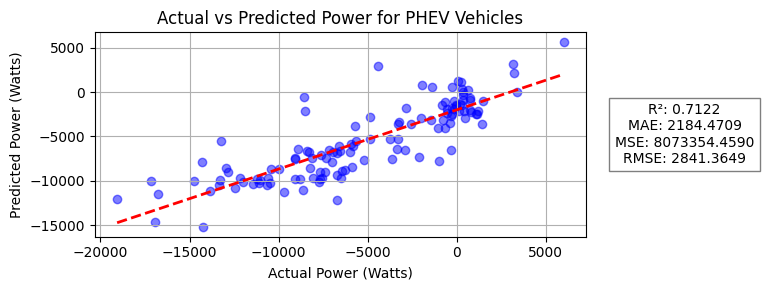

In [87]:
'''
Scenario 1 for PHEV
Selected features and target for linear regression analysis on PHEV data.
Performed linear regression using the selected features to predict HV Battery Power.
Plotted Actual vs Predicted Power for PHEV vehicles, including regression line and evaluation metrics (R², MAE, MSE, RMSE).
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Engine RPM[RPM]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight',
            ]
'''

features = [
    'Engine RPM[RPM]',
    'Air Conditioning Power[Watts]',
    'Vehicle Speed[km/h]',
    'OAT[DegC]',
]

target = 'HV Battery Power[Watts]'
X = df_PHEV[features]
y = df_PHEV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(8, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for PHEV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(
    1.20, 0.5,
    f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
    fontsize=10, ha='center', va='center', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
df_ICE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1850 entries, 3086 to 3723
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Trip                            1850 non-null   int64  
 1   Vehicle Type                    1850 non-null   object 
 2   Latitude[deg]                   1850 non-null   float64
 3   Longitude[deg]                  1850 non-null   float64
 4   Air Conditioning Power[Watts]   1850 non-null   float64
 5   Heater Power[Watts]             0 non-null      float64
 6   Vehicle Speed[km/h]             1850 non-null   float64
 7   Distance[km]                    1850 non-null   float64
 8   Engine RPM[RPM]                 1850 non-null   float64
 9   OAT[DegC]                       1850 non-null   float64
 10  Generalized_Weight              1850 non-null   float64
 11  FCR                             1850 non-null   float64
 12  HV Battery Power[Watts]         1850

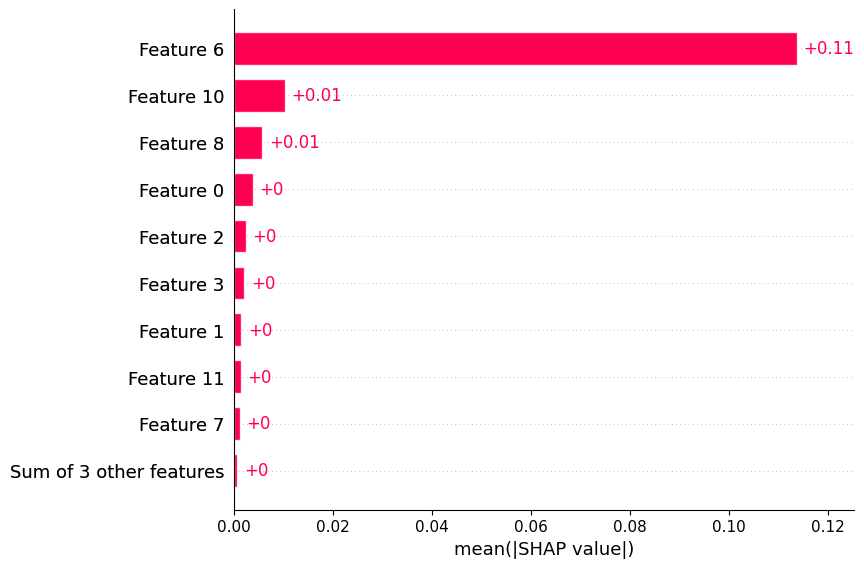

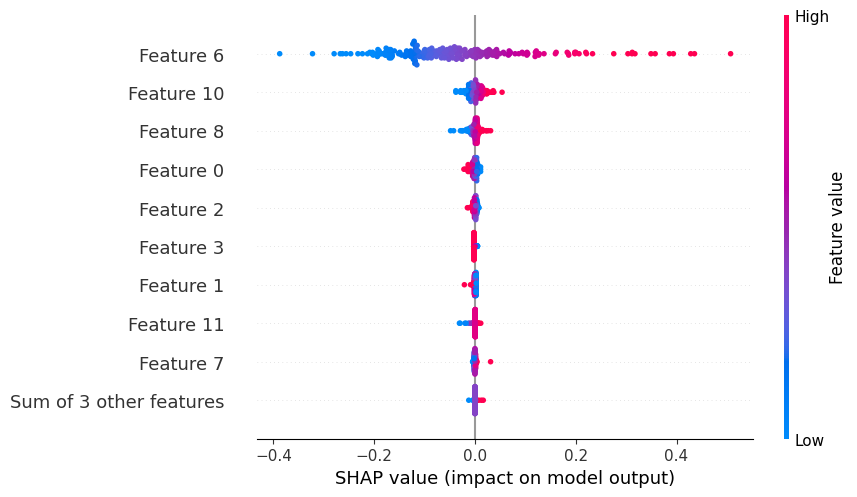

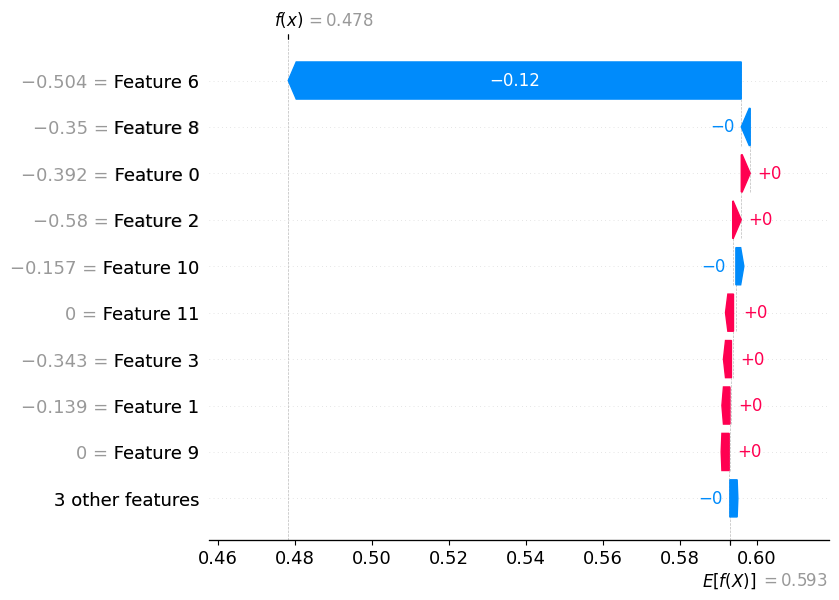

,Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
0,0.002323,0.000396,0.002229,0.000534,-0.000119,-0.0,-0.117554,-0.000057,-0.002329,0.000192,-0.000825,0.000613
1,-0.004610,0.000477,0.000417,0.002119,0.000116,-0.0,0.185491,0.000156,0.005444,0.000192,-0.010098,0.000613
2,0.006633,-0.000043,-0.000759,-0.001930,-0.000119,-0.0,-0.109387,0.000487,-0.010127,0.000192,-0.006545,0.000613
3,-0.001457,-0.000090,0.001661,0.000494,-0.000119,-0.0,-0.104673,-0.000157,0.003040,0.000192,0.015050,0.000613
4,0.000815,0.000157,0.000368,-0.001640,-0.000119,-0.0,-0.120312,-0.000818,-0.000773,0.000192,0.004881,0.000613


In [89]:
'''
This cell performs SHAP (SHapley Additive exPlanations) analysis on a linear regression model for HEV vehicles:

1. Imports required libraries for SHAP analysis, linear regression, and data preprocessing
2. Defines features including vehicle performance metrics, environmental conditions, and fuel system parameters
3. Sets FCR (Fuel Consumption Rate) as the target variable for HEV vehicles
4. Standardizes features using StandardScaler to improve SHAP analysis with linear models
5. Splits data into training and testing sets (80/20 split)
6. Trains a LinearRegression model on the standardized training data
7. Creates a SHAP explainer for the linear model using training data
8. Generates SHAP values for test data to understand feature importance
9. Visualizes SHAP analysis through:
   - Bar plot showing overall feature importance
   - Beeswarm plot showing feature effects distribution
   - Waterfall plot for individual prediction explanation
10. Creates a DataFrame of SHAP values for further analysis
'''

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example features and target
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
               'Engine RPM[RPM]',
                 'OAT[DegC]',
                   'Generalized_Weight',
                   'HV Battery Power[Watts]',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
                   ]

target = 'FCR'
X = df_HEV[features]
y = df_HEV[target]

# Standardize features (optional but helps SHAP with linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)  # uses LinearExplainer
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

shap.plots.beeswarm(shap_values)

shap.plots.waterfall(shap_values[0])

shap_df = pd.DataFrame(shap_values.values, columns=features)
shap_df.head()

# Predictive Modeling Performance


*   **Hybrid Electric Vehicles (HEV):** Achieved the highest predictive accuracy.
    *   *Trip-based Split:* $R^2 \approx 0.92$
    *   *Time-based Split:* $R^2 \approx 0.98$
*   **Plug-in Hybrid (PHEV):** Strong performance in predicting battery power.
    *   *Trip-based Split:* $R^2 \approx 0.82$
    *   *Time-based Split:* $R^2 \approx 0.84$
*   **Internal Combustion (ICE):** Performance relied heavily on feature selection.
    *   Basic features (Speed, RPM): $R^2 \approx 0.31$
    *   Advanced features (MAF, Fuel Trims, Load): $R^2$ improved to **0.62** (Trip) and **0.86** (Time).
*   **Electric Vehicles (EV):** Proved most difficult to model linearly.
    *   *Trip-based Split:* $R^2 \approx 0.32$
    *   *Time-based Split:* $R^2 \approx 0.54$

# K means Clustering Classification models to categorize vehicle type

In [90]:
df_combined = pd.concat([df_ICE, df_HEV, df_PHEV, df_EV], ignore_index=True)

In [91]:
push_df_to_s3_parquet(df_combined, 'Cleaned up VED Source Data/df_combined.parquet')

DataFrame uploaded to s3://s3aravindh973515031797/Cleaned up VED Source Data/df_combined.parquet


In [92]:
df_combined_k = df_combined[['Trip','FCR']]

In [93]:
df_combined_sf = df_combined[['Vehicle Speed[km/h]','FCR']]

In [94]:
df_combined_sb = df_combined[['Vehicle Speed[km/h]','HV Battery Power[Watts]']]

In [95]:
df_combined_of = df_combined[['OAT[DegC]','FCR']]

In [96]:
df_combined_ob = df_combined[['OAT[DegC]','HV Battery Power[Watts]']]

In [97]:
'''
This cell:
- Imports necessary libraries: numpy, matplotlib.pyplot, and KMeans from sklearn.
- Defines a function `plot_kmeans_elbow` that:
    - Computes KMeans clustering inertia for cluster counts from 1 to 4.
    - Calculates the difference in inertia to suggest an optimal number of clusters (elbow point).
    - Prints the suggested optimal K.
    - Plots the inertia values (elbow curve) to visually assist in selecting the optimal number of clusters.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_elbow(df):
    """
    Plots the elbow curve for KMeans clustering to help select the optimal number of clusters.
    
    Args:
        df (pd.DataFrame): DataFrame containing the features for clustering.
    """
    inertia = []
    for i in range(1, 5):
        kmeans = KMeans(n_clusters=i, init='random', random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_) 

    # Find elbow point (simple method: where the decrease in inertia slows down the most)
    diff = np.diff(inertia)
    elbow_k = np.argmin(diff) + 2  # +2 because diff is one less and we start from k=1
    print("Suggested optimal K:", elbow_k)   

    # Plot the elbow curve
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, 5), inertia, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K Selection')
    plt.grid(True)
    plt.show()


Suggested optimal K: 2


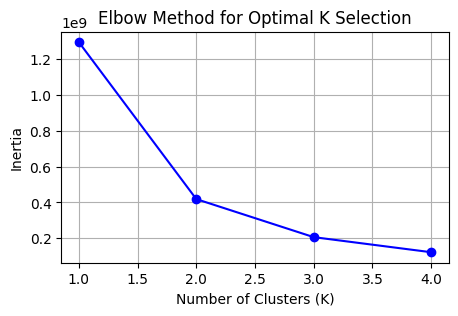

In [98]:
plot_kmeans_elbow(df_combined_k)

In [99]:
'''
This cell:
- Imports KMeans from sklearn.
- Defines a function `fit_predict_kmeans` that:
    - Fits KMeans clustering to the input DataFrame with a specified number of clusters.
    - Predicts cluster labels for the input data.
    - Adds a new 'Cluster' column to the DataFrame with the assigned cluster labels.
    - Returns the modified DataFrame, the predicted cluster labels, and the fitted KMeans object.
'''

from sklearn.cluster import KMeans

def fit_predict_kmeans(df, n_clusters, random_state=42):
    """
    Fits KMeans clustering on the given DataFrame and returns a copy with a new 'Cluster' column.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame (features only, no target).
        n_clusters (int): Number of clusters to use.
        random_state (int): Random state for reproducibility.
        
    Returns:
        pd.DataFrame: A copy of the input DataFrame with an added 'Cluster' column.
        np.ndarray: The predicted cluster labels.
        KMeans: The fitted KMeans object.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df)
    pred = kmeans.predict(df)
    df['Cluster'] = kmeans.labels_
    return df, pred, kmeans

# Example usage:
# df_with_clusters, cluster_labels, kmeans_model = fit_predict_kmeans(df, elbow_k)

In [100]:
fit_predict_kmeans(df_combined_k, 4)

(      Trip       FCR  Cluster
 0     1637  2.298379        3
 1      293  2.188477        0
 2      340  2.076016        0
 3     1455  1.994577        3
 4     2016  1.984249        1
 ...    ...       ...      ...
 3722   658  0.000000        2
 3723   728  0.000000        2
 3724  1674  0.000000        3
 3725  1026  0.000000        2
 3726   596  0.000000        0
 
 [3727 rows x 3 columns],
 array([3, 0, 0, ..., 3, 2, 0], shape=(3727,), dtype=int32),
 KMeans(n_clusters=4, random_state=42))

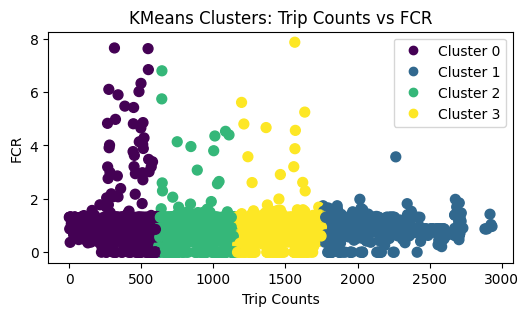

In [101]:
'''
This cell:
- Creates a scatter plot of 'Trip' vs 'FCR' from df_combined_k.
- Colors the points by their assigned KMeans cluster using the 'Cluster' column.
- Sets axis labels and a title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_k['Trip'],
    df_combined_k['FCR'],
    c=df_combined_k['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Trip Counts')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Trip Counts vs FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

Suggested optimal K: 2


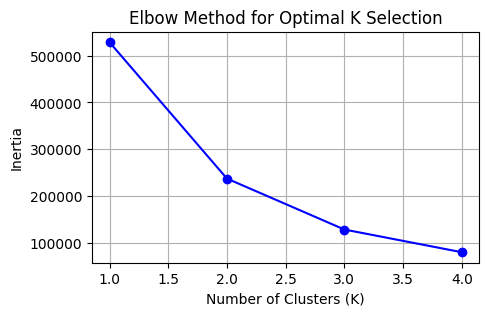

In [102]:
plot_kmeans_elbow(df_combined_sf)

In [103]:
fit_predict_kmeans(df_combined_sf,4)

(      Vehicle Speed[km/h]       FCR  Cluster
 0               71.199588  2.298379        1
 1               55.280435  2.188477        3
 2               55.131579  2.076016        3
 3               78.166852  1.994577        1
 4               36.728477  1.984249        0
 ...                   ...       ...      ...
 3722            65.420500  0.000000        1
 3723            64.908588  0.000000        1
 3724            36.466653  0.000000        0
 3725            58.251157  0.000000        3
 3726            65.121893  0.000000        1
 
 [3727 rows x 3 columns],
 array([1, 3, 3, ..., 0, 3, 1], shape=(3727,), dtype=int32),
 KMeans(n_clusters=4, random_state=42))

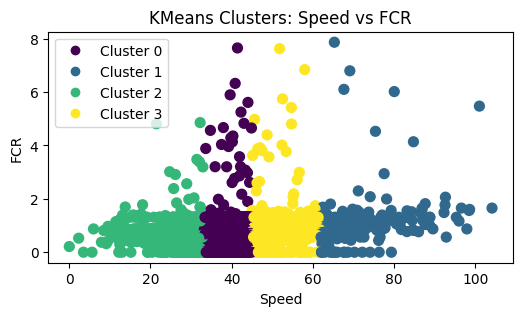

In [104]:
'''
This cell:
- Creates a scatter plot of 'Vehicle Speed[km/h]' vs 'FCR' from df_combined_sf.
- Colors the points by their assigned KMeans cluster using the 'Cluster' column.
- Sets axis labels and a title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_sf['Vehicle Speed[km/h]'],
    df_combined_sf['FCR'],
    c=df_combined_sf['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Speed')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Speed vs FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

In [105]:
df_combined_sf = df_combined[['Vehicle Type','Vehicle Speed[km/h]','FCR']]
df_combined_sf.head()

,Vehicle Type,Vehicle Speed[km/h],FCR
0,ICE,71.199588,2.298379
1,ICE,55.280435,2.188477
2,ICE,55.131579,2.076016
3,ICE,78.166852,1.994577
4,ICE,36.728477,1.984249


In [106]:
'''
This cell:
- Maps the 'Vehicle Type' column in df_combined_sf from string labels ('ICE', 'HEV', 'EV', 'PHEV')
  to numeric codes (0, 1, 2, 3) for further analysis or modeling.
'''

df_combined_sf['Vehicle Type'] = df_combined_sf['Vehicle Type'].map({'ICE': 0, 'HEV': 1, 'EV': 2, 'PHEV': 3})

Suggested optimal K: 2


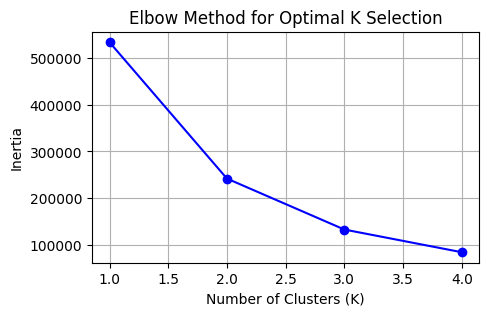

In [107]:
plot_kmeans_elbow(df_combined_sf)

In [108]:
fit_predict_kmeans(df_combined_sf,3)

(      Vehicle Type  Vehicle Speed[km/h]       FCR  Cluster
 0                0            71.199588  2.298379        1
 1                0            55.280435  2.188477        1
 2                0            55.131579  2.076016        1
 3                0            78.166852  1.994577        1
 4                0            36.728477  1.984249        2
 ...            ...                  ...       ...      ...
 3722             2            65.420500  0.000000        1
 3723             2            64.908588  0.000000        1
 3724             2            36.466653  0.000000        2
 3725             2            58.251157  0.000000        1
 3726             2            65.121893  0.000000        1
 
 [3727 rows x 4 columns],
 array([1, 1, 1, ..., 2, 1, 1], shape=(3727,), dtype=int32),
 KMeans(n_clusters=3, random_state=42))

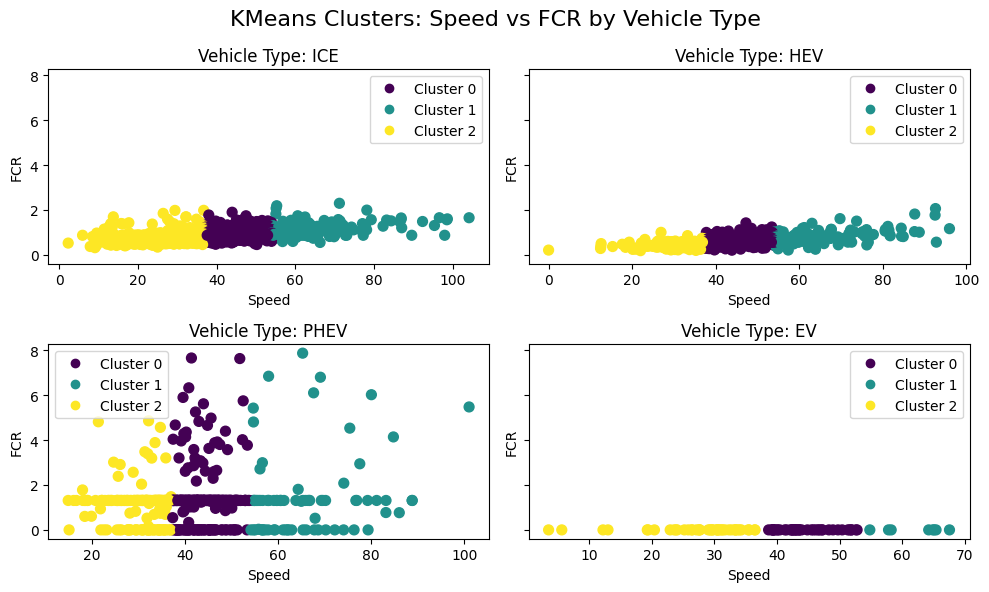

In [109]:
'''
This code:
- Imports matplotlib for plotting.
- Gets the unique vehicle types from the dataframe.
- Creates a 2x2 grid of subplots for visualizing each vehicle type.
- Iterates over each vehicle type, filtering the dataframe for that type.
- Plots a scatter plot of Speed vs FCR for each vehicle type, colored by cluster.
- Maps numeric vehicle type codes back to string labels for subplot titles.
- Sets axis labels and adds a legend for clusters in each subplot.
- Sets a common title for the figure and adjusts layout.
- Displays the plot.
'''

import matplotlib.pyplot as plt

vehicle_types = df_combined_sf['Vehicle Type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()

for i, vtype in enumerate(vehicle_types):
    ax = axes[i]
    subset = df_combined_sf[df_combined_sf['Vehicle Type'] == vtype]
    scatter = ax.scatter(
        subset['Vehicle Speed[km/h]'],
        subset['FCR'],
        c=subset['Cluster'],
        cmap='viridis',
        s=50
    )
    # Map numeric vehicle type back to string for title
    vtype_str = {0: "ICE", 1: "HEV", 2: "EV", 3: "PHEV"}.get(vtype, str(vtype))
    ax.set_title(f'Vehicle Type: {vtype_str}')
    ax.set_xlabel('Speed')
    ax.set_ylabel('FCR')
    handles, labels = scatter.legend_elements(prop="colors")
    ax.legend(handles, [f"Cluster {i}" for i in range(len(handles))])

fig.suptitle('KMeans Clusters: Speed vs FCR by Vehicle Type', fontsize=16)
plt.tight_layout()
plt.show()

Suggested optimal K: 2


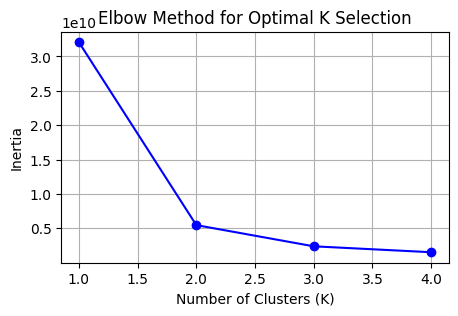

In [110]:
plot_kmeans_elbow(df_combined_sb)

In [111]:
fit_predict_kmeans(df_combined_sb,3)

(      Vehicle Speed[km/h]  HV Battery Power[Watts]  Cluster
 0               71.199588                 0.000000        0
 1               55.280435                 0.000000        0
 2               55.131579                 0.000000        0
 3               78.166852                 0.000000        0
 4               36.728477                 0.000000        0
 ...                   ...                      ...      ...
 3722            65.420500            -11560.435733        1
 3723            64.908588            -12142.036859        1
 3724            36.466653            -12732.903288        1
 3725            58.251157            -13526.524390        1
 3726            65.121893            -13857.507261        1
 
 [3727 rows x 3 columns],
 array([0, 0, 0, ..., 1, 1, 1], shape=(3727,), dtype=int32),
 KMeans(n_clusters=3, random_state=42))

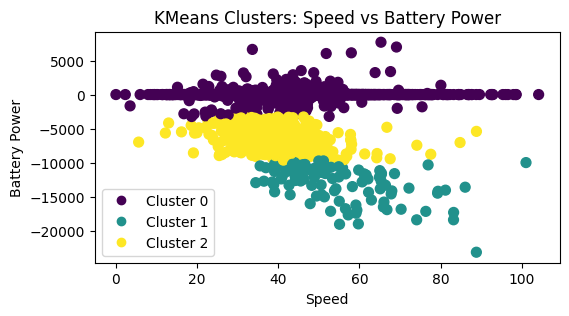

In [112]:
'''
- Creates a scatter plot of Vehicle Speed vs HV Battery Power, colored by KMeans cluster assignment.
- Sets axis labels and plot title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_sb['Vehicle Speed[km/h]'],
    df_combined_sb['HV Battery Power[Watts]'],
    c=df_combined_sb['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Speed')
plt.ylabel('Battery Power')
plt.title('KMeans Clusters: Speed vs Battery Power')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

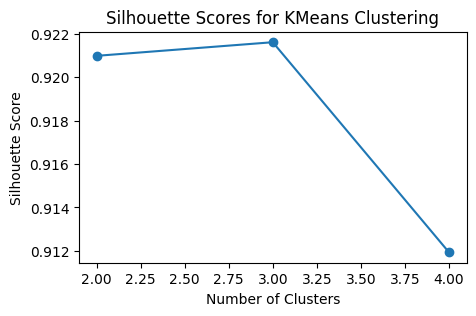

In [113]:
'''
This code calculates the silhouette score for KMeans clustering on the features
'Vehicle Speed[km/h]' and 'HV Battery Power[Watts]' from the dataframe df_combined_sb.
- It iterates over a range of cluster numbers (2 to 10).
- For each number of clusters, it fits a KMeans model and computes the silhouette score.
- The silhouette score measures how well each data point fits within its cluster (higher is better).
- Finally, it plots the silhouette scores against the number of clusters to help select the optimal cluster count.
'''

# Calculate silhouette score for each cluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score for each cluster
silhouette_scores = []
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_combined_sb[['Vehicle Speed[km/h]', 'HV Battery Power[Watts]']])
    labels = kmeans.labels_
    score = silhouette_score(df_combined_sb[['Vehicle Speed[km/h]', 'HV Battery Power[Watts]']], labels)
    silhouette_scores.append((n_clusters, score))
    
# Plot silhouette scores
plt.figure(figsize=(5, 3))
plt.plot([score[0] for score in silhouette_scores], [score[1] for score in silhouette_scores], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.show() 

In [114]:
df_combined_sb = df_combined[['Vehicle Type','Vehicle Speed[km/h]','HV Battery Power[Watts]']]
# map vehicle type to 0,1,2,3
df_combined_sb['Vehicle Type'] = df_combined_sb['Vehicle Type'].map({'ICE': 0, 'HEV': 1, 'EV': 2, 'PHEV': 3})

df_combined_sb.head()

,Vehicle Type,Vehicle Speed[km/h],HV Battery Power[Watts]
0,0,71.199588,0.0
1,0,55.280435,0.0
2,0,55.131579,0.0
3,0,78.166852,0.0
4,0,36.728477,0.0


Suggested optimal K: 2


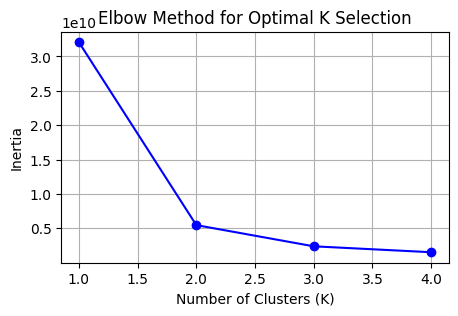

(      Vehicle Type  Vehicle Speed[km/h]  HV Battery Power[Watts]  Cluster
 0                0            71.199588                 0.000000        0
 1                0            55.280435                 0.000000        0
 2                0            55.131579                 0.000000        0
 3                0            78.166852                 0.000000        0
 4                0            36.728477                 0.000000        0
 ...            ...                  ...                      ...      ...
 3722             2            65.420500            -11560.435733        1
 3723             2            64.908588            -12142.036859        1
 3724             2            36.466653            -12732.903288        1
 3725             2            58.251157            -13526.524390        1
 3726             2            65.121893            -13857.507261        1
 
 [3727 rows x 4 columns],
 array([0, 0, 0, ..., 1, 1, 1], shape=(3727,), dtype=int32),
 KMeans(n_c

In [115]:
plot_kmeans_elbow(df_combined_sb)
fit_predict_kmeans(df_combined_sb,3)

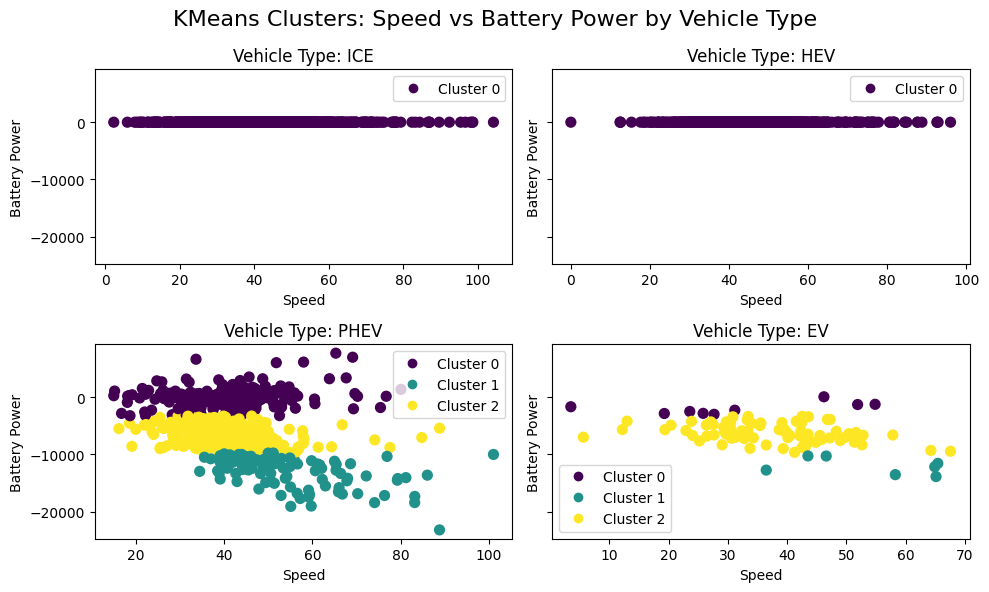

In [116]:
'''
This code creates a 2x2 grid of scatter plots, one for each vehicle type, showing the relationship between 'Vehicle Speed[km/h]' and 'HV Battery Power[Watts]' for each type. 
- It iterates over unique vehicle types, selects the corresponding subset of data, and plots the points colored by their KMeans cluster assignment.
- The numeric vehicle type is mapped back to a string for the plot title.
- Each subplot includes a legend for the clusters.
- The overall figure is titled and laid out neatly.
'''

import matplotlib.pyplot as plt

vehicle_types = df_combined_sf['Vehicle Type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()

for i, vtype in enumerate(vehicle_types):
    ax = axes[i]
    subset = df_combined_sb[df_combined_sb['Vehicle Type'] == vtype]
    scatter = ax.scatter(
        subset['Vehicle Speed[km/h]'],
        subset['HV Battery Power[Watts]'],
        c=subset['Cluster'],
        cmap='viridis',
        s=50
    )
    # Map numeric vehicle type back to string for title
    vtype_str = {0: "ICE", 1: "HEV", 2: "EV", 3: "PHEV"}.get(vtype, str(vtype))
    ax.set_title(f'Vehicle Type: {vtype_str}')
    ax.set_xlabel('Speed')
    ax.set_ylabel('Battery Power')
    handles, labels = scatter.legend_elements(prop="colors")
    ax.legend(handles, [f"Cluster {i}" for i in range(len(handles))])

fig.suptitle('KMeans Clusters: Speed vs Battery Power by Vehicle Type', fontsize=16)
plt.tight_layout()
plt.show()

In [117]:
df_combined_sb

,Vehicle Type,Vehicle Speed[km/h],HV Battery Power[Watts],Cluster
0,0,71.199588,0.000000,0
1,0,55.280435,0.000000,0
2,0,55.131579,0.000000,0
3,0,78.166852,0.000000,0
4,0,36.728477,0.000000,0
...,...,...,...,...
3722,2,65.420500,-11560.435733,1
3723,2,64.908588,-12142.036859,1
3724,2,36.466653,-12732.903288,1
3725,2,58.251157,-13526.524390,1


Suggested optimal K: 2


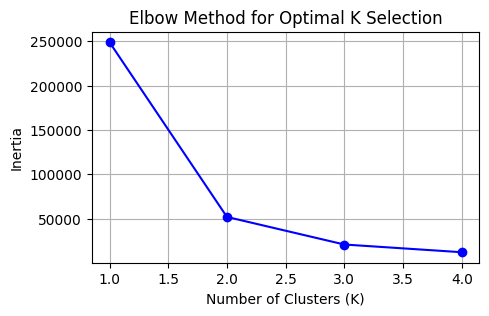

(      OAT[DegC]       FCR  Cluster
 0     15.000000  2.298379        0
 1     -4.954545  2.188477        1
 2      6.611650  2.076016        2
 3     15.000000  1.994577        0
 4     15.000000  1.984249        0
 ...         ...       ...      ...
 3722   2.673522  0.000000        3
 3723   6.500000  0.000000        2
 3724   1.240812  0.000000        3
 3725  -2.682927  0.000000        1
 3726  -5.061386  0.000000        1
 
 [3727 rows x 3 columns],
 array([0, 1, 2, ..., 3, 1, 1], shape=(3727,), dtype=int32),
 KMeans(n_clusters=5, random_state=42))

In [118]:
plot_kmeans_elbow(df_combined_of)
fit_predict_kmeans(df_combined_of,5)

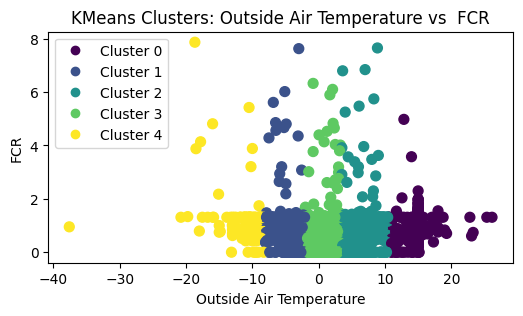

In [119]:
'''
This code creates a scatter plot to visualize KMeans clustering results.
- It plots 'OAT[DegC]' (Outside Air Temperature) vs 'FCR', coloring points by their cluster assignment.
- The color map 'viridis' is used for cluster coloring.
- The plot includes axis labels, a title, and a legend indicating cluster numbers.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_of['OAT[DegC]'],
    df_combined_of['FCR'],
    c=df_combined_of['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Outside Air Temperature')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Outside Air Temperature vs  FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

Suggested optimal K: 2


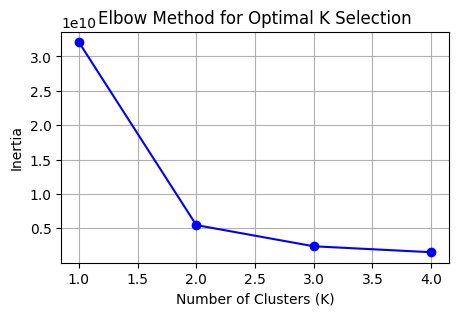

(      OAT[DegC]  HV Battery Power[Watts]  Cluster
 0     15.000000                 0.000000        0
 1     -4.954545                 0.000000        0
 2      6.611650                 0.000000        0
 3     15.000000                 0.000000        0
 4     15.000000                 0.000000        0
 ...         ...                      ...      ...
 3722   2.673522            -11560.435733        1
 3723   6.500000            -12142.036859        1
 3724   1.240812            -12732.903288        1
 3725  -2.682927            -13526.524390        1
 3726  -5.061386            -13857.507261        3
 
 [3727 rows x 3 columns],
 array([0, 0, 0, ..., 1, 1, 3], shape=(3727,), dtype=int32),
 KMeans(n_clusters=5, random_state=42))

In [120]:
plot_kmeans_elbow(df_combined_ob)
fit_predict_kmeans(df_combined_ob,5)

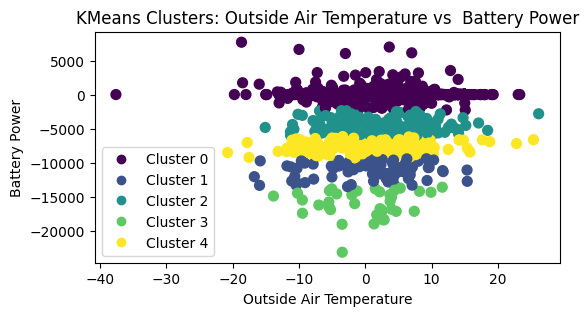

In [121]:
'''
This code creates a scatter plot to visualize KMeans clustering results.
- It plots 'OAT[DegC]' (Outside Air Temperature) vs 'HV Battery Power[Watts]', coloring points by their cluster assignment.
- The color map 'viridis' is used for cluster coloring.
- The plot includes axis labels, a title, and a legend indicating cluster numbers.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_ob['OAT[DegC]'],
    df_combined_ob['HV Battery Power[Watts]'],
    c=df_combined_ob['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Outside Air Temperature')
plt.ylabel('Battery Power')
plt.title('KMeans Clusters: Outside Air Temperature vs  Battery Power')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

# Final Verdict

*   **Feasibility:** Predicting energy consumption using standard OBD-II data is highly feasible for Hybrid and ICE vehicles, provided that engine load and fuel trim data are available.
*   **Model Robustness:** **HEV models** were the most robust, likely due to the consistent interplay between the engine and battery systems captured in the data.
*   **Feature Importance:** **Mass Air Flow (MAF)** and **Absolute Load** are the most critical predictors for fuel consumption. For EVs, simple kinematic variables (Speed, Distance) are insufficient for high-accuracy power prediction, suggesting the need for road gradient or auxiliary load data.
*   **Methodology:** Time-based data splitting yielded superior metrics compared to random trip splitting, highlighting the importance of temporal continuity in driving data analysis.
